In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
sys.path.insert(0, "C:/workspace/data-science//libs")
from simulation_core import Simulation

pd.set_option('display.max_columns', None)

In [ ]:
def plot_mints(mitigated_mints: pd.DataFrame, pure_mints: pd.DataFrame, pool_name: str, width: int=10, height: int=10):
    """plot red line of original mints and blue dots of mitigated ones

    Args:
        mitigated_mints (pd.DataFrame): dataset of mitigated mints
        pure_mints (pd.DataFrame): pure dataset of mints without mitigation
        width (int, optional): width. Defaults to 10.
        height (int, optional): height. Defaults to 10.
    """
    fig, ax = plt.subplots(figsize=(width, height))
    ax2 = ax.twinx()

    ax.plot(pd.to_datetime(pure_mints.timestamp, unit='s'), pure_mints.Y_amount, c='red', label='mitigation off')
    ax2.plot_date(pd.to_datetime(mitigated_mints.timestamp, unit='s'), mitigated_mints.Y_amount, linestyle='--', c='blue', label='mitigation on')

    ax.set_title(f'Scatterplot of the mints for {pool_name} pool')
    plt.legend()
    ax.set_xlabel('time')
    ax.set_ylabel('Y token amount')
    ax2.set_ylabel('Y token mitigated amount')
    fig.autofmt_xdate(rotation=25)
    ax.grid(True, linestyle='--')

    plt.show()

In [ ]:
# classic pools
wbtc_usdc_sim = Simulation(experiment_id = 1, x_name = 'WBTC', y_name = 'USDC', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
weth_usdc_sim = Simulation(experiment_id = 2, x_name = 'WETH', y_name = 'USDC', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_", x_index='1', y_index='0')
wbtc_dai_sim = Simulation(experiment_id = 3, x_name = 'WBTC', y_name = 'DAI', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
fei_weth_sim = Simulation(experiment_id = 4, x_name = 'FEI', y_name = 'WETH', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
hkmt_usdt_sim = Simulation(experiment_id = 5, x_name = 'HKMT', y_name = 'USDT', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
ixs_weth_sim = Simulation(experiment_id = 6, x_name = 'IXS', y_name = 'WETH', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")

**IMPORTANT: launch those simulations only if there is no data in package ```data\real_transactions```, otherwise skip this part (comment it)**

In [ ]:
# # classic pools
# wbtc_usdc_sim.run_simulation(isBurnAvailable = True, isMintAvailable = True)    # passed, experiment 1
# weth_usdc_sim.run_simulation(isBurnAvailable = True, isMintAvailable = True)    # passed, experiment 2
# wbtc_dai_sim.run_simulation(isBurnAvailable = True, isMintAvailable = True)     # passed, experiment 3
# fei_weth_sim.run_simulation(isBurnAvailable = True, isMintAvailable = True)     # passed, experiment 4
# hkmt_usdt_sim.run_simulation(isBurnAvailable = True, isMintAvailable = True)    # passed, experiment 5
# ixs_weth_sim.run_simulation(isBurnAvailable = True, isMintAvailable = True)     # passed, experiment 6

Reading all simulations separating them by categories for pool types.

## Classic Pool (WBTC/USDC, WETH/USDC, WBTC/DAI, FEI/WETH, HKMT/USDT, IXS/WETH)

In [ ]:
wbtc_usdc_swaps_mitigation_off_df, wbtc_usdc_mints_mitigation_off_df, wbtc_usdc_burns_mitigation_off_df = wbtc_usdc_sim.read_simulation(0)
wbtc_usdc_swaps_mitigation_on_df, wbtc_usdc_mints_mitigation_on_df, wbtc_usdc_burns_mitigation_on_df = wbtc_usdc_sim.read_simulation(1)

weth_usdc_swaps_mitigation_off_df, weth_usdc_mints_mitigation_off_df, weth_usdc_burns_mitigation_off_df = weth_usdc_sim.read_simulation(0)
weth_usdc_swaps_mitigation_on_df, weth_usdc_mints_mitigation_on_df, weth_usdc_burns_mitigation_on_df = weth_usdc_sim.read_simulation(1)

wbtc_dai_swaps_mitigation_off_df, wbtc_dai_mints_mitigation_off_df, wbtc_dai_burns_mitigation_off_df = wbtc_dai_sim.read_simulation(0)
wbtc_dai_swaps_mitigation_on_df, wbtc_dai_mints_mitigation_on_df, wbtc_dai_burns_mitigation_on_df = wbtc_dai_sim.read_simulation(1)

fei_weth_swaps_mitigation_off_df, fei_weth_mints_mitigation_off_df, fei_weth_burns_mitigation_off_df = fei_weth_sim.read_simulation(0)
fei_weth_swaps_mitigation_on_df, fei_weth_mints_mitigation_on_df, fei_weth_burns_mitigation_on_df = fei_weth_sim.read_simulation(1)

hkmt_usdt_swaps_mitigation_off_df, hkmt_usdt_mints_mitigation_off_df, hkmt_usdt_burns_mitigation_off_df = hkmt_usdt_sim.read_simulation(0)
hkmt_usdt_swaps_mitigation_on_df, hkmt_usdt_mints_mitigation_on_df, hkmt_usdt_burns_mitigation_on_df = hkmt_usdt_sim.read_simulation(1)

ixs_weth_swaps_mitigation_off_df, ixs_weth_mints_mitigation_off_df, ixs_weth_burns_mitigation_off_df = ixs_weth_sim.read_simulation(0)
ixs_weth_swaps_mitigation_on_df, ixs_weth_mints_mitigation_on_df, ixs_weth_burns_mitigation_on_df = ixs_weth_sim.read_simulation(1)

# WBTC/USDC pool

There are around 68 200 transactions in the pool with 631 mints and 478 burns from May 2020 till November 2021, meaning large transaction history.

In [ ]:
wbtc_usdc_mints_mitigation_off_df

In [ ]:
wbtc_usdc_burns_mitigation_off_df

In [ ]:
wbtc_usdc_swaps_df = wbtc_usdc_sim.get_original_swaps_df()
wbtc_usdc_swaps_df

In [ ]:
plot_mints(wbtc_usdc_mints_mitigation_on_df, wbtc_usdc_mints_mitigation_off_df, pool_name='WBTC/USDC')

## MEV transactions extraction and analysis

### MEV attacks and possible MEVs extraction

There are 77 MEV attacks performed on the pool

In [ ]:
wbtc_usdc_filtered_swaps_df, wbtc_usdc_mevs_df = wbtc_usdc_sim.extract_filtered_and_mevs_dfs()

In [ ]:
wbtc_usdc_suspicious_filtered_swaps_df, wbtc_usdc_possible_mevs_df = wbtc_usdc_sim.extract_suspicious_and_filtered_swaps_dfs()

In [ ]:
wbtc_usdc_mevs_df = wbtc_usdc_sim.calculate_attack_profit(wbtc_usdc_mevs_df)
wbtc_usdc_mevs_df = wbtc_usdc_sim.calculate_attack_profit_by_token(wbtc_usdc_mevs_df)
wbtc_usdc_mevs_df

### Plotting values of MEVs and possible MEVs with filtered swaps values

Plotting MEV transactions

In [ ]:
wbtc_usdc_sim.show_swaps_and_mevs_by_token(wbtc_usdc_filtered_swaps_df, wbtc_usdc_mevs_df, width=15, height=5)

Plotting suspicious transactions

In [ ]:
wbtc_usdc_sim.show_swaps_and_mevs_by_token(wbtc_usdc_suspicious_filtered_swaps_df, wbtc_usdc_possible_mevs_df, width=15, height=5)

### Plotting MEV transactions and possible MEV transactions with filtered swaps daily count distributions

Plotting MEV transactions and swaps daily count distributions

In [ ]:
wbtc_usdc_sim.show_swaps_and_mevs_daily_count_by_token(wbtc_usdc_filtered_swaps_df, wbtc_usdc_mevs_df, mevs_alter_axis=True)

In [ ]:
wbtc_usdc_sim.show_swaps_and_mevs_daily_count_by_token(wbtc_usdc_suspicious_filtered_swaps_df, wbtc_usdc_possible_mevs_df, mevs_alter_axis=True)

### Plotting ratio of MEV attacks to filtered swaps

Plotting ratio of daily count

In [ ]:
wbtc_usdc_sim.show_mevs_to_swaps_ratio(wbtc_usdc_filtered_swaps_df, wbtc_usdc_mevs_df)

In [ ]:
wbtc_usdc_sim.show_mevs_to_swaps_ratio(wbtc_usdc_suspicious_filtered_swaps_df, wbtc_usdc_possible_mevs_df)

### Plotting ratio of MEVs and suspicious transactions to filtered swaps

In [ ]:
wbtc_usdc_sim.show_mevs_to_reserves_ratio(wbtc_usdc_swaps_mitigation_off_df, wbtc_usdc_mevs_df, width=15, height=10)
wbtc_usdc_sim.show_mevs_values_to_reserves_ratio(wbtc_usdc_swaps_mitigation_off_df, wbtc_usdc_mevs_df, width=15, height=10)

### Plotting transaction values distribution of passed swaps, blocked swaps and not enough reserves swaps

In [ ]:
wbtc_usdc_sim.plot_transactions_by_type(wbtc_usdc_swaps_mitigation_on_df, ignore_success=False, width=15, height=7)

In [ ]:
wbtc_usdc_sim.show_mitigation_comparison(wbtc_usdc_swaps_mitigation_off_df, wbtc_usdc_swaps_mitigation_on_df)
wbtc_usdc_sim.px_hist_blocked_transactions_slice(wbtc_usdc_swaps_mitigation_on_df)
wbtc_usdc_sim.px_hist_blocked_transactions_difference_from_oracle(wbtc_usdc_swaps_mitigation_on_df)
wbtc_usdc_sim.plot_slice_distribution_and_diff_limit_line(wbtc_usdc_swaps_mitigation_on_df)
wbtc_usdc_sim.plot_reserves_with_and_without_mitigation(wbtc_usdc_swaps_mitigation_off_df, wbtc_usdc_swaps_mitigation_on_df)
wbtc_usdc_sim.plot_cumulative_prices_with_and_without_mitigation(wbtc_usdc_swaps_mitigation_off_df, wbtc_usdc_swaps_mitigation_off_df)
wbtc_usdc_sim.plot_price_distribution(wbtc_usdc_swaps_mitigation_off_df, wbtc_usdc_swaps_mitigation_on_df, separate_plots=True)
wbtc_usdc_sim.plot_frequency_distribution(wbtc_usdc_swaps_mitigation_on_df)
wbtc_usdc_sim.plot_price_impact(wbtc_usdc_swaps_mitigation_off_df, wbtc_usdc_swaps_mitigation_on_df, 
                                smallest_y=wbtc_usdc_swaps_mitigation_off_df['price_diff'].min(), 
                                biggest_y=wbtc_usdc_swaps_mitigation_off_df['price_diff'].max())

In [ ]:
wbtc_usdc_blocked_df = wbtc_usdc_swaps_mitigation_on_df[wbtc_usdc_swaps_mitigation_on_df['status'] == 'BLOCKED_BY_VOLATILITY_MITIGATION']
wbtc_usdc_blocked_mevs_df = pd.merge(wbtc_usdc_blocked_df, wbtc_usdc_mevs_df, on='txd')
wbtc_usdc_blocked_mevs_df

# WETH/USDC pool

There are around 2 896 000 transaction with 32 000 mints and 23 370 burns

In [ ]:
weth_usdc_mints_mitigation_off_df

In [ ]:
weth_usdc_burns_mitigation_off_df

In [ ]:
weth_usdc_swaps_mitigation_off_df

In [ ]:
plot_mints(weth_usdc_mints_mitigation_on_df, weth_usdc_mints_mitigation_off_df, pool_name='WETH/USDC')

## MEV transactions extraction and analysis

### MEV attacks and possible MEVs extraction

There are 136 MEV attacks performed on the pool and 8789 possible attacks

In [ ]:
weth_usdc_filtered_swaps_df, weth_usdc_mevs_df = weth_usdc_sim.extract_filtered_and_mevs_dfs()

In [ ]:
weth_usdc_suspicious_filtered_swaps_df, weth_usdc_possible_mevs_df = weth_usdc_sim.extract_suspicious_and_filtered_swaps_dfs()

In [ ]:
weth_usdc_mevs_df = weth_usdc_sim.calculate_attack_profit(weth_usdc_mevs_df)

In [ ]:
weth_usdc_mevs_df

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(weth_usdc_mevs_df.timestamp, weth_usdc_mevs_df.amount_usd)
ax.set_xlabel('Time')
ax.set_ylabel('Transaction capitalization in USD')
ax.set_title('MEV transactions capitalization values')
ax.grid(True, linestyle='--')

plt.show()

In [ ]:
weth_usdc_possible_mevs_df

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(weth_usdc_possible_mevs_df.timestamp, weth_usdc_possible_mevs_df.amount_usd)
ax.set_xlabel('Time')
ax.set_ylabel('Transaction capitalization in USD')
ax.set_title('MEV transactions capitalization values (difference <5%)')
ax.grid(True, linestyle='--')

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(weth_usdc_possible_mevs_df[weth_usdc_possible_mevs_df.amount_usd > 300].timestamp, weth_usdc_possible_mevs_df[weth_usdc_possible_mevs_df.amount_usd > 300].amount_usd)
ax.set_xlabel('Time')
ax.set_ylabel('Transaction capitalization in USD')
ax.set_title('MEV transactions capitalization values (difference <5%)')
ax.grid(True, linestyle='--')

plt.show()

### Plotting values of MEVs and possible MEVs with filtered swaps values

In [ ]:
weth_usdc_sim.show_swaps_and_mevs_by_token(weth_usdc_filtered_swaps_df, weth_usdc_mevs_df, width=15, height=5)

In [ ]:
weth_usdc_sim.show_swaps_and_mevs_by_token(weth_usdc_suspicious_filtered_swaps_df, weth_usdc_possible_mevs_df, width=15, height=5)

In [ ]:
weth_usdc_sim.show_swaps_and_mevs_by_token(weth_usdc_suspicious_filtered_swaps_df, weth_usdc_possible_mevs_df[weth_usdc_possible_mevs_df.amount_usd > 5000], width=15, height=5)

### Plotting MEV transactions and possible MEV transactions with filtered swaps daily count distributions

In [ ]:
weth_usdc_sim.show_swaps_and_mevs_daily_count_by_token(weth_usdc_filtered_swaps_df, weth_usdc_mevs_df, mevs_alter_axis=True)

In [ ]:
weth_usdc_sim.show_swaps_and_mevs_daily_count_by_token(weth_usdc_filtered_swaps_df, weth_usdc_mevs_df[weth_usdc_mevs_df.amount_usd > 5000], mevs_alter_axis=True)

In [ ]:
weth_usdc_sim.show_swaps_and_mevs_daily_count_by_token(weth_usdc_suspicious_filtered_swaps_df, weth_usdc_possible_mevs_df, mevs_alter_axis=True)

In [ ]:
weth_usdc_sim.show_swaps_and_mevs_daily_count_by_token(weth_usdc_suspicious_filtered_swaps_df, weth_usdc_possible_mevs_df[weth_usdc_possible_mevs_df.amount_usd > 5000], mevs_alter_axis=True)

### Plotting ratio of MEV attacks to filtered swaps

In [ ]:
weth_usdc_sim.show_mevs_to_swaps_ratio(weth_usdc_filtered_swaps_df, weth_usdc_mevs_df)

In [ ]:
weth_usdc_sim.show_mevs_to_swaps_ratio(weth_usdc_suspicious_filtered_swaps_df, weth_usdc_possible_mevs_df)

### Plotting ratio of MEVs and suspicious transactions to filtered swaps

In [ ]:
weth_usdc_sim.show_mevs_to_reserves_ratio(weth_usdc_swaps_mitigation_off_df, weth_usdc_mevs_df, width=15, height=10)
weth_usdc_sim.show_mevs_values_to_reserves_ratio(weth_usdc_swaps_mitigation_off_df, weth_usdc_mevs_df, width=15, height=10)

In [ ]:
weth_usdc_sim.show_mevs_to_reserves_ratio(weth_usdc_swaps_mitigation_off_df.iloc[:1700000], weth_usdc_mevs_df, width=15, height=10)
weth_usdc_sim.show_mevs_values_to_reserves_ratio(weth_usdc_swaps_mitigation_off_df.iloc[:1700000], weth_usdc_mevs_df, width=15, height=10)

### Plotting transaction values distribution of passed swaps, blocked swaps and not enough reserves swaps

In [ ]:
weth_usdc_sim.plot_transactions_by_type(weth_usdc_swaps_mitigation_on_df, ignore_success=False, width=15, height=7)

### Plotting mitigation comparison, slice factor distribution, reserves distributions, cumulative prices distributions, transaction frequency distributions, price impact after each transaction distributions

In [ ]:
weth_usdc_sim.show_mitigation_comparison(weth_usdc_swaps_mitigation_off_df, weth_usdc_swaps_mitigation_on_df)
weth_usdc_sim.px_hist_blocked_transactions_slice(weth_usdc_swaps_mitigation_on_df)
weth_usdc_sim.px_hist_blocked_transactions_difference_from_oracle(weth_usdc_swaps_mitigation_on_df)
weth_usdc_sim.plot_slice_distribution_and_diff_limit_line(weth_usdc_swaps_mitigation_on_df)
weth_usdc_sim.plot_reserves_with_and_without_mitigation(weth_usdc_swaps_mitigation_off_df, weth_usdc_swaps_mitigation_on_df)
weth_usdc_sim.plot_cumulative_prices_with_and_without_mitigation(weth_usdc_swaps_mitigation_off_df, weth_usdc_swaps_mitigation_off_df)
weth_usdc_sim.plot_price_distribution(weth_usdc_swaps_mitigation_off_df, weth_usdc_swaps_mitigation_on_df, separate_plots=True)
weth_usdc_sim.plot_frequency_distribution(weth_usdc_swaps_mitigation_on_df)
weth_usdc_sim.plot_price_impact(weth_usdc_swaps_mitigation_off_df, weth_usdc_swaps_mitigation_on_df, 
                                smallest_y=weth_usdc_swaps_mitigation_off_df['price_diff'].min(), 
                                biggest_y=weth_usdc_swaps_mitigation_off_df['price_diff'].max())

In [ ]:
weth_usdc_sim.plot_price_impact(weth_usdc_swaps_mitigation_off_df, weth_usdc_swaps_mitigation_on_df, 
                                smallest_y=weth_usdc_swaps_mitigation_off_df['price_diff'].min(), 
                                biggest_y=weth_usdc_swaps_mitigation_off_df['price_diff'].max() / 10000000000000000000000
                               )

### MEVs blocked by mitigation mechanism

In [ ]:
weth_usdc_blocked_df = weth_usdc_swaps_mitigation_on_df[weth_usdc_swaps_mitigation_on_df['status'] == 'BLOCKED_BY_VOLATILITY_MITIGATION']
weth_usdc_blocked_mevs_df = pd.merge(weth_usdc_blocked_df, weth_usdc_mevs_df, on='txd')
weth_usdc_blocked_mevs_df

In [ ]:
weth_usdc_blocked_df = weth_usdc_swaps_mitigation_on_df[weth_usdc_swaps_mitigation_on_df['status'] == 'BLOCKED_BY_VOLATILITY_MITIGATION']
weth_usdc_blocked_mevs_df = pd.merge(weth_usdc_blocked_df, weth_usdc_possible_mevs_df[weth_usdc_possible_mevs_df.amount_usd < 6000], on='txd')
print(weth_usdc_blocked_mevs_df.token_out_amount.unique())
weth_usdc_blocked_mevs_df

In [ ]:
weth_usdc_blocked_mevs_df['txd'][0]

### Possible MEVs blocked by mitigation mechanism

In [ ]:
weth_usdc_blocked_df = weth_usdc_swaps_mitigation_on_df[weth_usdc_swaps_mitigation_on_df['status'] == 'BLOCKED_BY_VOLATILITY_MITIGATION']
weth_usdc_blocked_mevs_df = pd.merge(weth_usdc_blocked_df, weth_usdc_possible_mevs_df, on='txd')
weth_usdc_blocked_mevs_df

In [ ]:
weth_usdc_blocked_mevs_df['txd'][0]

# WBTC/DAI pool

In [ ]:
wbtc_dai_mints_mitigation_off_df

id  X_amount      Y_amount   timestamp   status  block_number  \
0        0  0.000058      0.573588  1589836736  SUCCESS             0   
1        2  0.015859    156.045929  1589840560  SUCCESS           255   
2       10  0.100000    940.896942  1590183428  SUCCESS         23113   
3       20  0.008735     77.283604  1590495779  SUCCESS         43937   
4       21  0.056679    501.500211  1590532666  SUCCESS         46396   
..     ...       ...           ...         ...      ...           ...   
182  13685  1.225796  75652.079257  1634363220  SUCCESS       2968433   
183  13686  1.434042  88504.336796  1634364202  SUCCESS       2968498   
184  13687  0.648123  40000.000070  1634365530  SUCCESS       2968587   
185  14070  0.394329  24999.999867  1636807350  SUCCESS       3131375   
186  14071  0.186206  11805.233920  1636807989  SUCCESS       3131417   

     block_timestamp  transaction_timestamp  transaction_id  reserve_X_before  \
0         1589836736             1589836736               0          0.000000   
1         1589840561             1589840560               2          0.000038   
2         1590183431             1590183428              10          0.016257   
3         1590495791             1590495779              20          0.119902   
4         1590532676             1590532666              21          0.128636   
..               ...                    ...             ...               ...   
182       1634363231             1634363220           13685          8.333621   
183       1634364206             1634364202           13686          9.559417   
184       1634365541             1634365530           13687         10.993458   
185       1636807361             1636807350           14070         10.692469   
186       1636807991             1636807989           14071         11.086798   

     reserve_Y_before      k_before  price_X_cumulative_before  \
0            0.000000  0.000000e+00                          0   
1            0.375192  1.430608e-05                          0   
2          152.973526  2.486920e+00                 1695761626   
3         1060.925601  1.272070e+02                 4248640392   
4         1138.209205  1.464152e+02                 4248640392   
..                ...           ...                        ...   
182     448941.544422  3.741309e+06              1313967753024   
183     524593.623679  5.014809e+06              1313967753024   
184     613097.960476  6.740067e+06              1313967753024   
185     677747.859384  7.246798e+06              1459556201648   
186     702747.859251  7.791224e+06              1459556201648   

     price_Y_cumulative_before  is_volatility_mitigator_on_before  reserve_X  \
0                            0                              False   0.000058   
1                            0                              False   0.015897   
2                           18                              False   0.116257   
3                           48                              False   0.128636   
4                           48                              False   0.185316   
..                         ...                                ...        ...   
182                       2352                              False   9.559417   
183                       2352                              False  10.993458   
184                       2352                              False  11.641581   
185                       2392                              False  11.086798   
186                       2392                              False  11.273004   

         reserve_Y             k  price_X_cumulative  price_Y_cumulative  \
0         0.573588  3.343446e-05                   0                   0   
1       156.421121  2.486587e+00                   0                   0   
2      1093.870468  1.271703e+02          1695761626                  18   
3      1138.209205  1.464152e+02          4248640392                  48   
4      1639.709416  3.03

In [ ]:
wbtc_dai_burns_mitigation_off_df

id  X_amount       Y_amount   timestamp   status  block_number  \
0        1  0.000020       0.198396  1589837037  SUCCESS            21   
1       41  0.100134     940.023349  1590787970  SUCCESS         63416   
2       54  0.164053    1560.514491  1591013238  SUCCESS         78434   
3       93  0.110400    1095.423005  1591889551  SUCCESS        136855   
4      103  0.205953    1835.102135  1592230528  SUCCESS        159587   
..     ...       ...            ...         ...      ...           ...   
133  13161  0.080422    3671.205894  1631383580  SUCCESS       2769790   
134  13496  6.832808  328088.100764  1633194862  SUCCESS       2890542   
135  13695  0.307307   18703.775899  1634429429  SUCCESS       2972847   
136  14161  0.029345    1694.250980  1637432264  SUCCESS       3173036   
137  14163  0.017674    1050.578463  1637434078  SUCCESS       3173157   

     block_timestamp  transaction_timestamp  transaction_id  reserve_X_before  \
0         1589837051             1589837037               1          0.000058   
1         1590787976             1590787970              41          0.564355   
2         1591013246             1591013238              54          0.474409   
3         1591889561             1591889551              93          0.575596   
4         1592230541             1592230528             103          0.490966   
..               ...                    ...             ...               ...   
133       1631383586             1631383580           13161          6.352392   
134       1633194866             1633194862           13496         14.417980   
135       1634429441             1634429429           13695         11.716548   
136       1637432276             1637432264           14161         11.809698   
137       1637434091             1637434078           14163         11.616067   

     reserve_Y_before      k_before  price_X_cumulative_before  \
0            0.573588  3.343446e-05                          0   
1         5295.820574  2.988722e+03                 7479764976   
2         4509.223226  2.139217e+03                 9648459531   
3         5703.618682  3.282981e+03                17402960443   
4         4368.487626  2.144777e+03                21302329515   
..                ...           ...                        ...   
133     221823.112961  1.409107e+06              1207766617495   
134     501760.910576  7.234379e+06              1274884022957   
135     648950.426578  7.603459e+06              1317379391581   
136     682918.593451  8.065062e+06              1498917292986   
137     690917.275537  8.025741e+06              1499386560383   

     price_Y_cumulative_before  is_volatility_mitigator_on_before  reserve_X  \
0                            0                              False   0.000038   
1                           87                              False   0.464221   
2                          111                              False   0.310356   
3                          194                              False   0.465196   
4                          238                              False   0.285013   
..                         ...                                ...        ...   
133                       2265                              False   6.271969   
134                       2315                              False   7.585172   
135                       2353                              False  11.409241   
136                       2403                              False  11.780353   
137                       2403                              False  11.598393   

         reserve_Y             k  price_X_cumulative  price_Y_cumulative  \
0         0.375192  1.430608e-05                   0                   0   
1      4355.797225  2.022053e+03          7479764976                  87   
2      2948.708735  9.151501e+02          9648459531                 111   
3      4608.195677  2.143714e+03         17402960443                 194   
4      2533.

In [ ]:
wbtc_dai_swaps_mitigation_off_df

id token_in token_out  token_in_amount  token_out_amount_min  \
0          3     WBTC       DAI         0.000039                   0.0   
1          4     WBTC       DAI         0.000017                   0.0   
2          5     WBTC       DAI         0.000256                   0.0   
3          6     WBTC       DAI         0.000022                   0.0   
4          7     WBTC       DAI         0.000022                   0.0   
...      ...      ...       ...              ...                   ...   
13867  14192      DAI      WBTC      6999.300000                   0.0   
13868  14193     WBTC       DAI         0.068615                   0.0   
13869  14194      DAI      WBTC        14.045500                   0.0   
13870  14195      DAI      WBTC      4999.996244                   0.0   
13871  14196     WBTC       DAI         0.072017                   0.0   

       token_out_amount  system_fee mitigator_check_status  oracle_amount_out  \
0              0.375990    0.001504          MITIGATOR_OFF                NaN   
1              0.161727    0.000647          MITIGATOR_OFF                NaN   
2              2.433899    0.009736          MITIGATOR_OFF                NaN   
3              0.207315    0.000829          MITIGATOR_OFF                NaN   
4              0.206752    0.000827          MITIGATOR_OFF                NaN   
...                 ...         ...                    ...                ...   
13867          0.122078   27.997200          MITIGATOR_OFF                NaN   
13868       3873.541917   15.494168          MITIGATOR_OFF                NaN   
13869          0.000245    0.056182          MITIGATOR_OFF                NaN   
13870          0.086672   19.999985          MITIGATOR_OFF                NaN   
13871       4077.378293   16.309513          MITIGATOR_OFF                NaN   

       out_amount_diff  slice_factor  slice_factor_curve   status  \
0                  NaN           NaN                 NaN  SUCCESS   
1                  NaN           NaN                 NaN  SUCCESS   
2                  NaN           NaN                 NaN  SUCCESS   
3                  NaN           NaN                 NaN  SUCCESS   
4                  NaN           NaN                 NaN  SUCCESS   
...                ...           ...                 ...      ...   
13867              NaN           NaN                 NaN  SUCCESS   
13868              NaN           NaN                 NaN  SUCCESS   
13869              NaN           NaN                 NaN  SUCCESS   
13870              NaN           NaN                 NaN  SUCCESS   
13871              NaN           NaN                 NaN  SUCCESS   

       block_number     block_timestamp transaction_timestamp  \
0            9267.0 2020-05-20 11:55:41   2020-05-20 11:55:36   
1           10862.0 2020-05-20 18:34:26   2020-05-20 18:34:15   
2           18053.0 2020-05-22 00:32:11   2020-05-22 00:32:08   
3           20436.0 2020-05-22 10:27:56   2020-05-22 10:27:44   
4           20447.0 2020-05-22 10:30:41   2020-05-22 10:30:29   
...             ...                 ...                   ...   
13867     3188419.0 2021-11-23 10:23:41   2021-11-23 10:23:37   
13868     3188666.0 2021-11-23 11:25:26   2021-11-23 11:25:14   
13869     3189380.0 2021-11-23 14:23:56   2021-11-23 14:23:54   
13870     3189516.0 2021-11-23 14:57:56   2021-11-23 14:57:44   
13871     3192393.0 2021-11-24 02:57:11   2021-11-24 02:57:11   

                                                     txd  \
0      0x337e7bf5b2b4c385597b11dffcf70d0cddac162d4772...   
1      0xd36f3e8bc306eb4c2ff894d1a8932c4647913af9d322...   
2      0xf3eaa95adf2319acf5b57db3f345b4a3f607bba4a833...   
3      0x5c08ee19949610beb1c54ae00eb576564a26a26cb029...   
4      0xb27b3c99425963ec06978be76fb6c47ce34eaf3fbb16...   
...                                                  ...   
13867  0x7acec6cf0b84e869540632be956ab4ef6f484b45cac8...   
13868  0x83db84a6f7f8e41984d0683b247ca87f1580282eda75...  

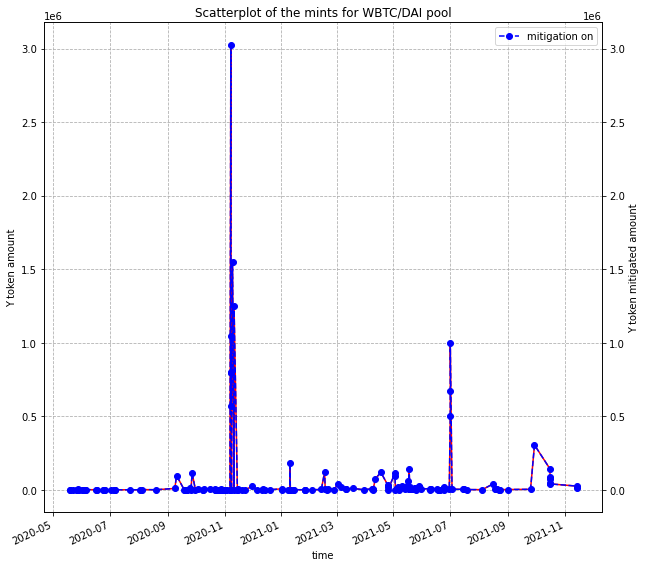

In [ ]:
plot_mints(wbtc_dai_mints_mitigation_on_df, wbtc_dai_mints_mitigation_off_df, pool_name='WBTC/DAI')

## MEV transactions extraction and analysis

### MEV attacks and possible MEVs extraction

There are 136 MEV attacks performed on the pool and 8789 possible attacks

In [ ]:
wbtc_dai_filtered_swaps_df, wbtc_dai_mevs_df = wbtc_dai_sim.extract_filtered_and_mevs_dfs()

initial len = 13873, filtered len = 13853
txds = 20
out values = 10


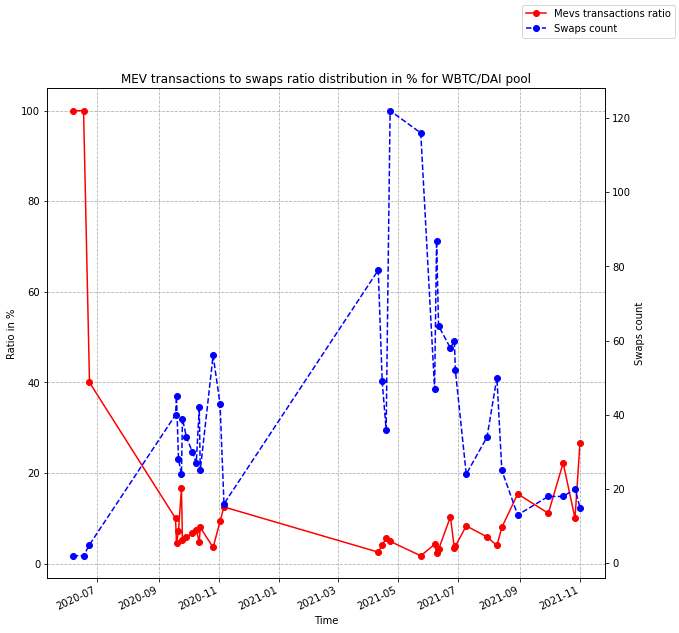

In [ ]:
wbtc_dai_sim.show_mevs_to_swaps_ratio(wbtc_dai_suspicious_filtered_swaps_df, wbtc_dai_possible_mevs_df)

In [ ]:
wbtc_dai_suspicious_filtered_swaps_df, wbtc_dai_possible_mevs_df = wbtc_dai_sim.extract_suspicious_and_filtered_swaps_dfs()

initial len = 13873, filtered len = 13783
txds = 90
out values = 45.0


In [ ]:
wbtc_dai_mevs_df = wbtc_dai_sim.calculate_attack_profit(wbtc_dai_mevs_df)

### Plotting values of MEVs and possible MEVs with filtered swaps values

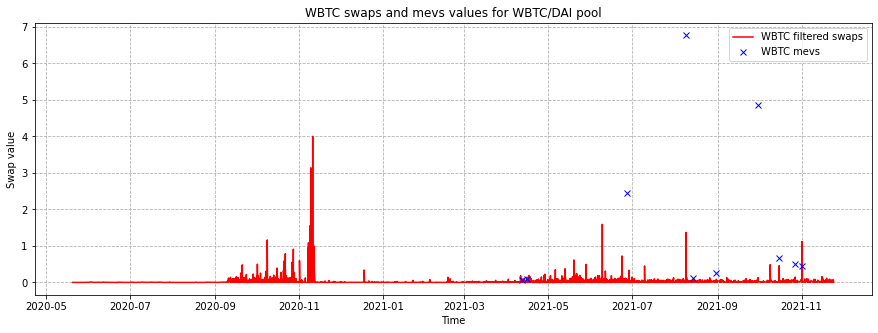

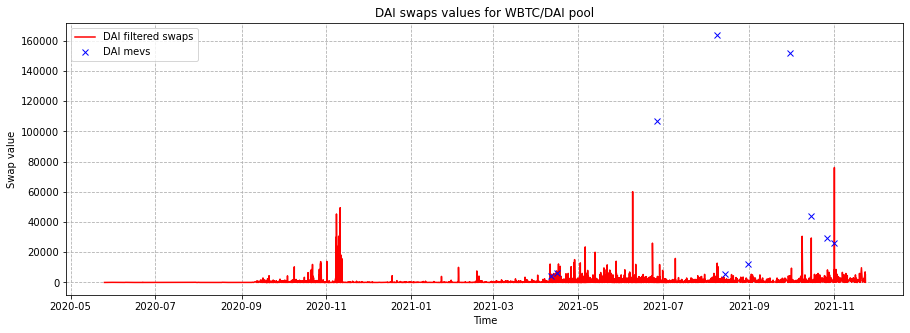

In [ ]:
wbtc_dai_sim.show_swaps_and_mevs_by_token(wbtc_dai_filtered_swaps_df, wbtc_dai_mevs_df, width=15, height=5)

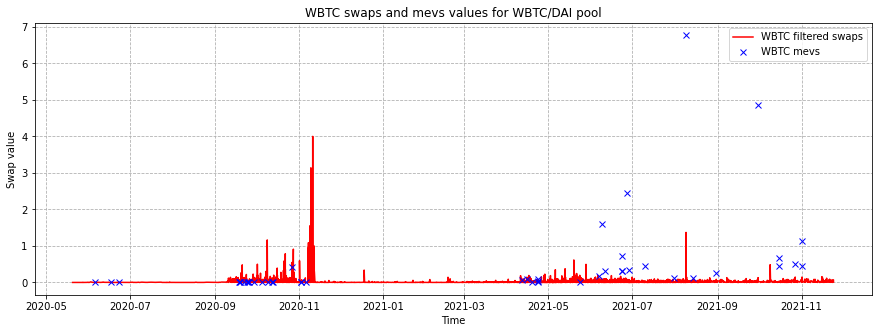

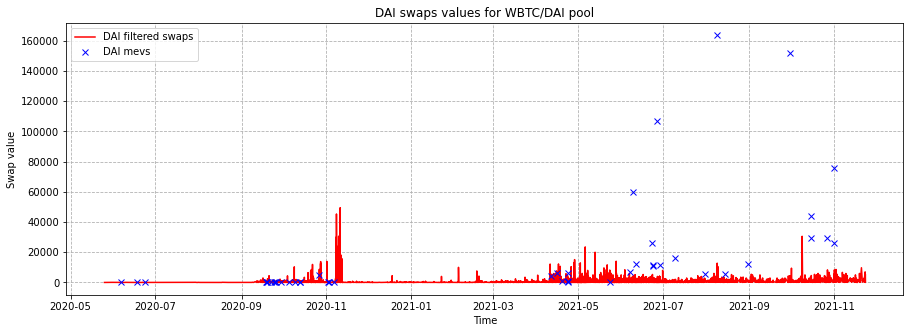

In [ ]:
wbtc_dai_sim.show_swaps_and_mevs_by_token(wbtc_dai_suspicious_filtered_swaps_df, wbtc_dai_possible_mevs_df, width=15, height=5)

### Plotting MEV transactions and possible MEV transactions with filtered swaps daily count distributions

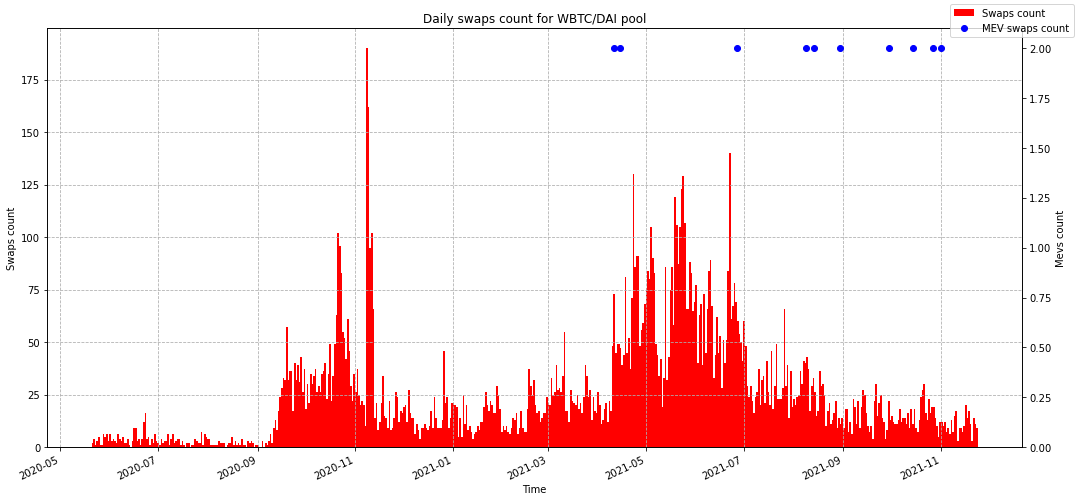

In [ ]:
wbtc_dai_sim.show_swaps_and_mevs_daily_count_by_token(wbtc_dai_filtered_swaps_df, wbtc_dai_mevs_df, mevs_alter_axis=True)

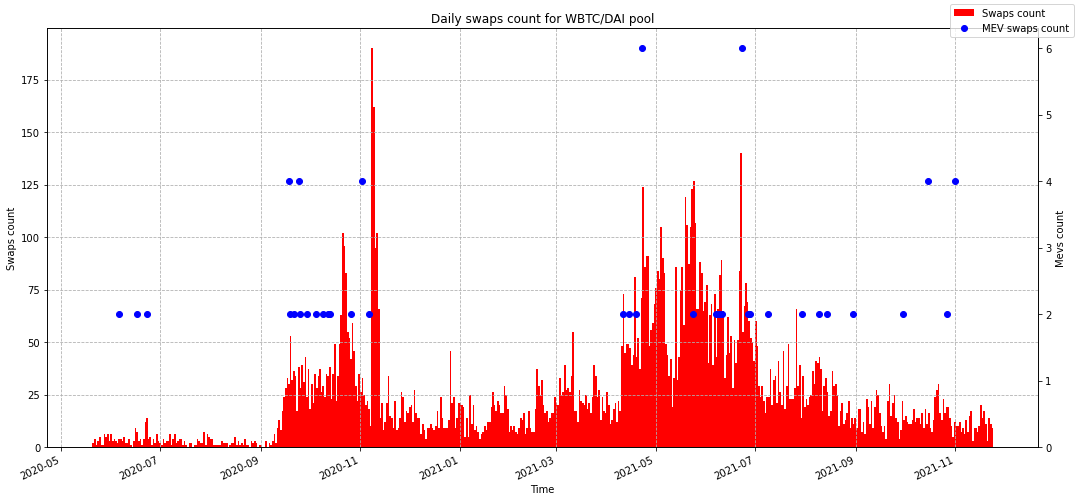

In [ ]:
wbtc_dai_sim.show_swaps_and_mevs_daily_count_by_token(wbtc_dai_suspicious_filtered_swaps_df, wbtc_dai_possible_mevs_df, mevs_alter_axis=True)

### Plotting ratio of MEV attacks to filtered swaps

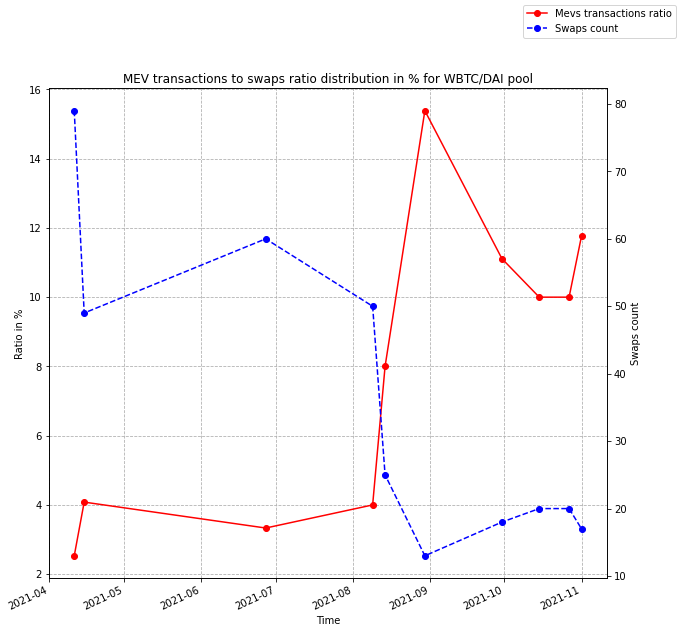

In [ ]:
wbtc_dai_sim.show_mevs_to_swaps_ratio(wbtc_dai_filtered_swaps_df, wbtc_dai_mevs_df)

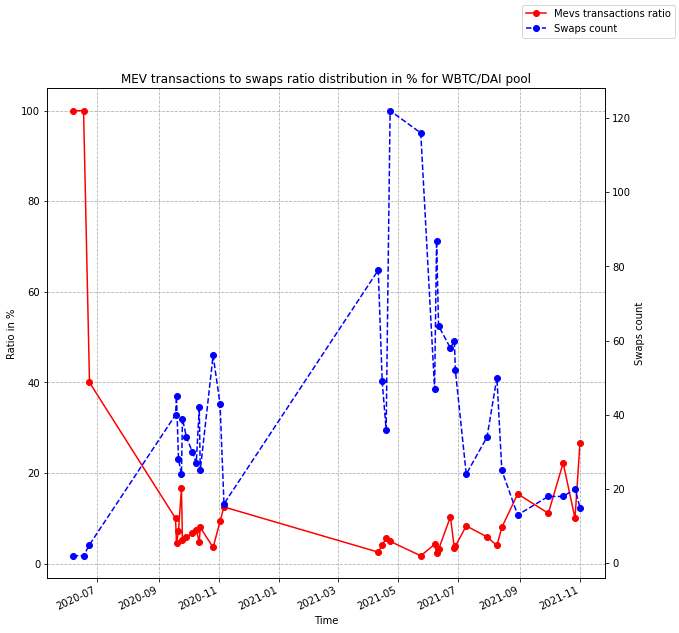

In [ ]:
wbtc_dai_sim.show_mevs_to_swaps_ratio(wbtc_dai_suspicious_filtered_swaps_df, wbtc_dai_possible_mevs_df)

### Plotting ratio of MEVs and suspicious transactions to filtered swaps

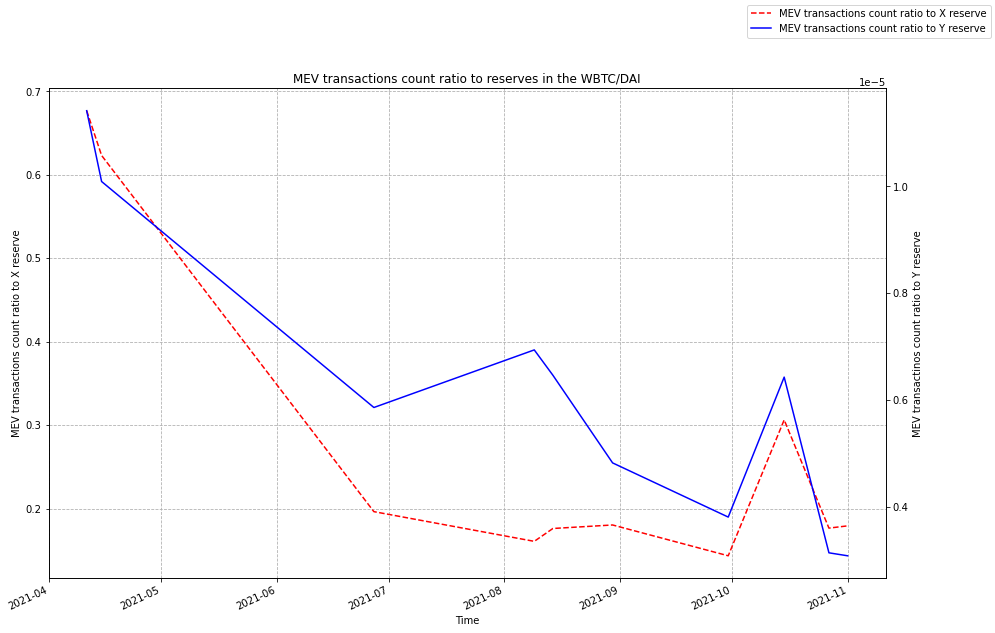

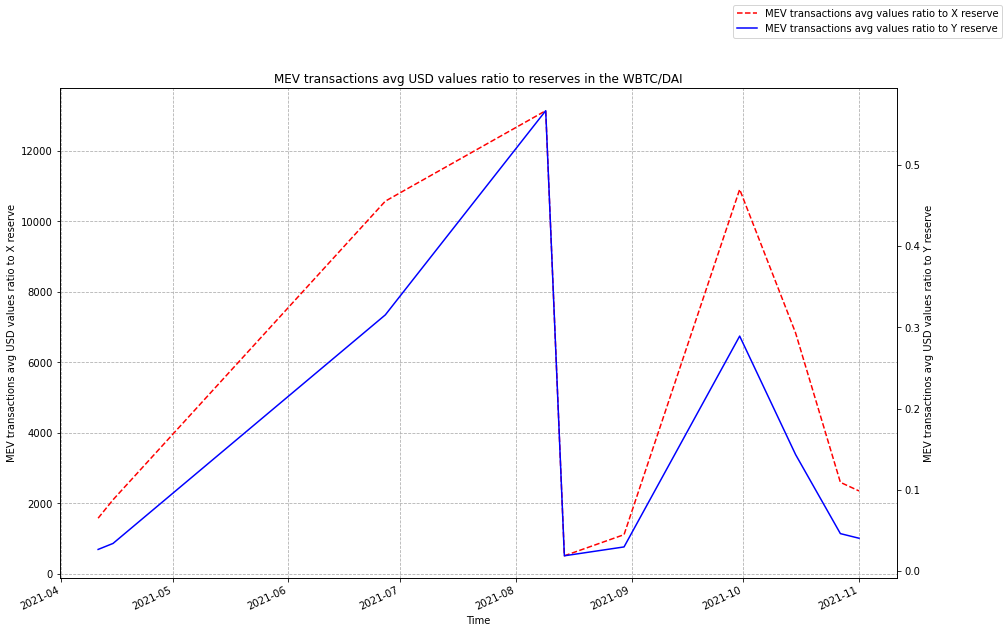

In [ ]:
wbtc_dai_sim.show_mevs_to_reserves_ratio(wbtc_dai_swaps_mitigation_off_df, wbtc_dai_mevs_df, width=15, height=10)
wbtc_dai_sim.show_mevs_values_to_reserves_ratio(wbtc_dai_swaps_mitigation_off_df, wbtc_dai_mevs_df, width=15, height=10)

### Plotting transaction values distribution of passed swaps, blocked swaps and not enough reserves swaps

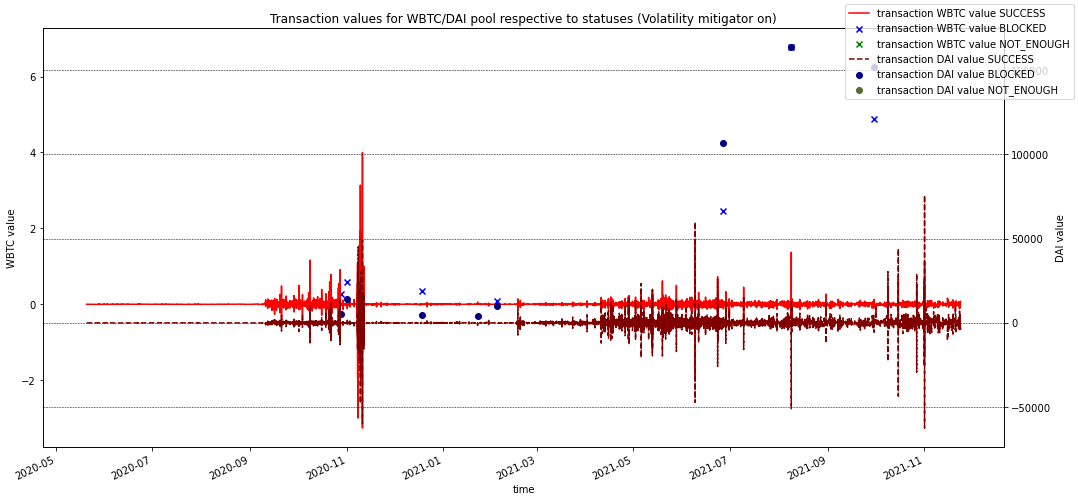

In [ ]:
wbtc_dai_sim.plot_transactions_by_type(wbtc_dai_swaps_mitigation_on_df, ignore_success=False, width=15, height=7)

### Plotting mitigation comparison, slice factor distribution, reserves distributions, cumulative prices distributions, transaction frequency distributions, price impact after each transaction distributions

Original WBTC/DAI pool has next statuses counts:
SUCCESS    13872
Name: status, dtype: int64
Mitigated WBTC/DAI dataframe has next statuses counts:
SUCCESS                             13857
BLOCKED_BY_VOLATILITY_MITIGATION       15
Name: status, dtype: int64
TWAP unavailability ratio for WBTC/DAI is 0.00021626297577854672
Mitigated WBTC/DAI dataframe has next Mitigator statuses:
CHECKED                13869
CANT_CONSULT_ORACLE        3
Name: mitigator_check_status, dtype: int64


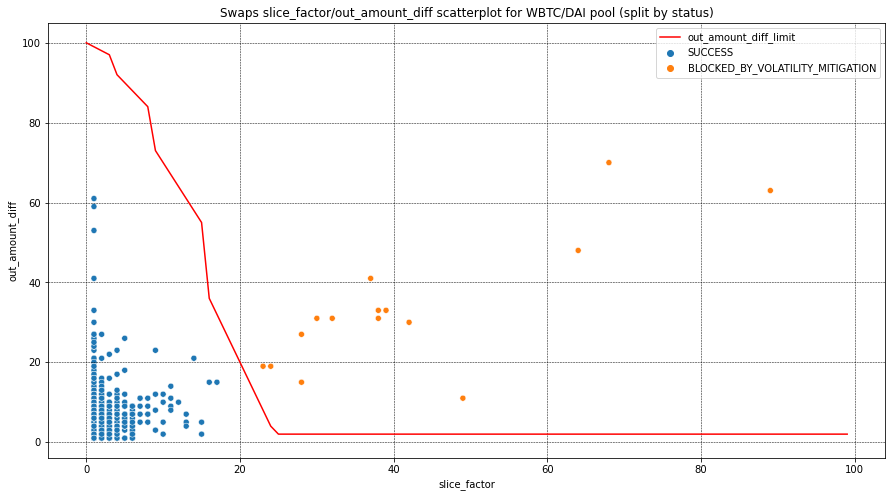

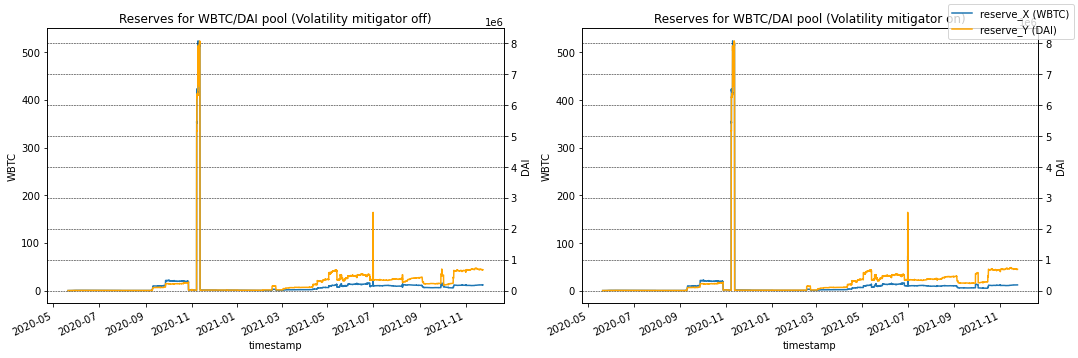

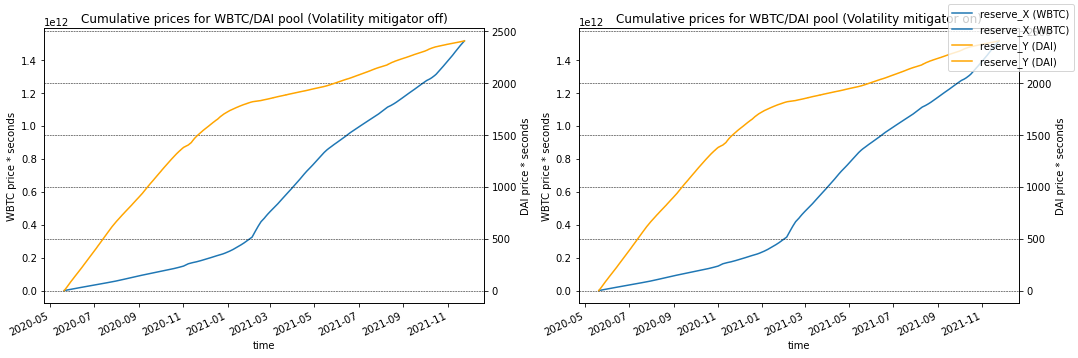

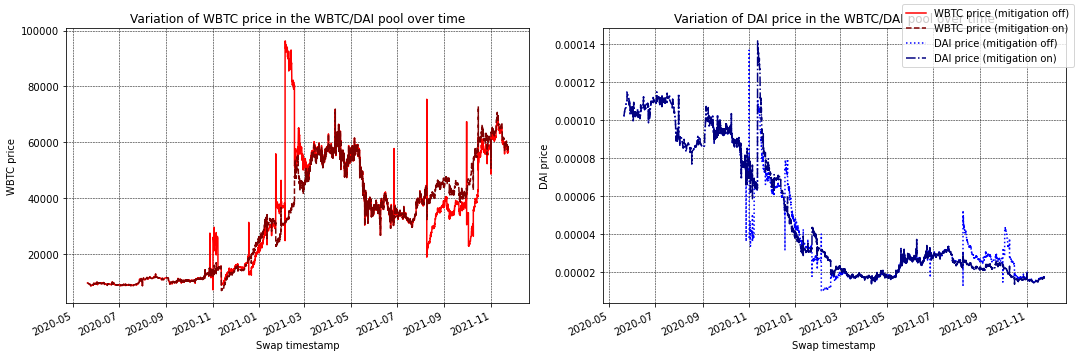

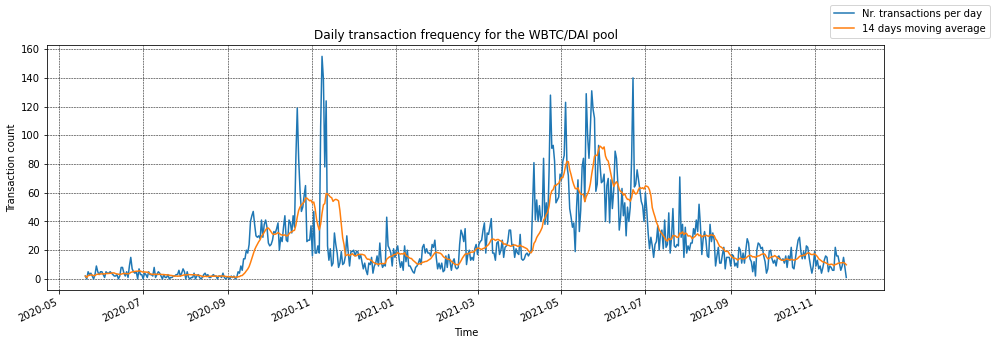

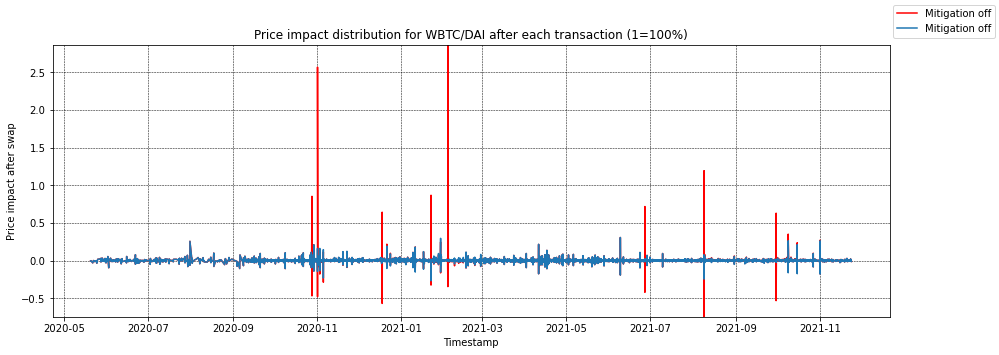

In [ ]:
wbtc_dai_sim.show_mitigation_comparison(wbtc_dai_swaps_mitigation_off_df, wbtc_dai_swaps_mitigation_on_df)
wbtc_dai_sim.px_hist_blocked_transactions_slice(wbtc_dai_swaps_mitigation_on_df)
wbtc_dai_sim.px_hist_blocked_transactions_difference_from_oracle(wbtc_dai_swaps_mitigation_on_df)
wbtc_dai_sim.plot_slice_distribution_and_diff_limit_line(wbtc_dai_swaps_mitigation_on_df)
wbtc_dai_sim.plot_reserves_with_and_without_mitigation(wbtc_dai_swaps_mitigation_off_df, wbtc_dai_swaps_mitigation_on_df)
wbtc_dai_sim.plot_cumulative_prices_with_and_without_mitigation(wbtc_dai_swaps_mitigation_off_df, wbtc_dai_swaps_mitigation_off_df)
wbtc_dai_sim.plot_price_distribution(wbtc_dai_swaps_mitigation_off_df, wbtc_dai_swaps_mitigation_on_df, separate_plots=True)
wbtc_dai_sim.plot_frequency_distribution(wbtc_dai_swaps_mitigation_on_df)
wbtc_dai_sim.plot_price_impact(wbtc_dai_swaps_mitigation_off_df, wbtc_dai_swaps_mitigation_on_df, 
                                smallest_y=wbtc_dai_swaps_mitigation_off_df['price_diff'].min(), 
                                biggest_y=wbtc_dai_swaps_mitigation_off_df['price_diff'].max())

In [ ]:
wbtc_dai_blocked_df = wbtc_dai_swaps_mitigation_on_df[wbtc_dai_swaps_mitigation_on_df['status'] == 'BLOCKED_BY_VOLATILITY_MITIGATION']
wbtc_dai_blocked_mevs_df = pd.merge(wbtc_dai_blocked_df, wbtc_dai_mevs_df, on='txd')
wbtc_dai_blocked_mevs_df

id token_in_x token_out_x  token_in_amount  token_out_amount_min  \
0  11101        DAI        WBTC    106808.338596                   0.0   
1  11102       WBTC         DAI         2.448900                   0.0   
2  12501        DAI        WBTC    163521.431029                   0.0   
3  12503       WBTC         DAI         6.765949                   0.0   
4  13465        DAI        WBTC    152135.514321                   0.0   
5  13467       WBTC         DAI         4.872345                   0.0   

   token_out_amount  system_fee mitigator_check_status  oracle_amount_out  \
0          2.397831         NaN                CHECKED           3.283780   
1      65819.845576         NaN                CHECKED       79761.565745   
2          3.342492         NaN                CHECKED           3.763208   
3     140836.308559         NaN                CHECKED      294040.125007   
4          2.754608         NaN                CHECKED           3.646677   
5     148412.121230         NaN                CHECKED      203341.187168   

   out_amount_diff  slice_factor  slice_factor_curve  \
0             31.0          32.0                98.0   
1             19.0          24.0                96.0   
2             11.0          49.0                98.0   
3             70.0          68.0                98.0   
4             27.0          28.0                98.0   
5             31.0          38.0                98.0   

                             status  block_number     block_timestamp  \
0  BLOCKED_BY_VOLATILITY_MITIGATION     2328032.0 2021-06-27 01:26:56   
1  BLOCKED_BY_VOLATILITY_MITIGATION     2328032.0 2021-06-27 01:26:56   
2  BLOCKED_BY_VOLATILITY_MITIGATION     2575557.0 2021-08-09 00:48:11   
3  BLOCKED_BY_VOLATILITY_MITIGATION     2575557.0 2021-08-09 00:48:11   
4  BLOCKED_BY_VOLATILITY_MITIGATION     2876971.0 2021-09-30 08:41:41   
5  BLOCKED_BY_VOLATILITY_MITIGATION     2876971.0 2021-09-30 08:41:41   

  transaction_timestamp                                                txd  \
0   2021-06-27 01:26:44  0xb9efaa9a9cac809ddd24f8b8816ffa5f39f5fb4df880...   
1   2021-06-27 01:26:44  0x3fe6174aaa8c5624c31adaf279fb77fb9a49757bb208...   
2   2021-08-09 00:47:57  0xa8d343b078a115bb78d4f118120da7ebce02bd25f1d9...   
3   2021-08-09 00:47:57  0x27a847da96b64ae10854b37c1878c4b3c2aa8be84ccc...   
4   2021-09-30 08:41:35  0x54a0213369dd322bf38da293af27b90289a6a70ae6c8...   
5   2021-09-30 08:41:35  0xc72b5a345274ac664170b2acacace0f407be77f714f7...   

                                     sender_x  \
0  0x00000000032962b51589768828ad878876299e14   
1  0x00000000032962b51589768828ad878876299e14   
2  0x00000000003b3cc22af3ae1eac0440bcee416b40   
3  0x00000000003b3cc22af3ae1eac0440bcee416b40   
4  0x00000000008c4fb1c916e0c88fd4cc402d935e7d   
5  0x00000000008c4fb1c916e0c88fd4cc402d935e7d   

                                         to_x  transaction_id  \
0  0x00000000032962b51589768828ad878876299e14           11101   
1  0xc3d03e4f041fd4cd388c549ee2a29a9e5075882f           11102   
2  0x86cccda3799a43fbceb4cec6ad8b028f5bf8b3dd           12501   
3  0x00000000003b3cc22af3ae1eac0440bcee416b40           12503   
4  0x00000000008c4fb1c916e0c88fd4cc402d935e7d           13465   
5  0x00000000008c4fb1c916e0c88fd4cc402d935e7d           13467   

   reserve_X_before  reserve_Y_before      k_before  \
0         10.121842     340615.700174  3.447658e+06   
1         10.121842     340615.700174  3.447658e+06   
2         10.295995     336777.538807  3.467460e+06   
3          9.923689     349488.952714  3.468220e+06   
4         12.910164     555277.131665  7.168719e+06   
5         13.042164     549690.539935  7.169154e+06   

   price_X_cumulative_before  price_Y_cumulative_before  \
0               902143962957                       2122   
1               902143962957                       2122   
2              1033937136898                       2228   
3              1033937136898                       2228   
4             

# FEI/WETH pool

In [ ]:
fei_weth_mints_mitigation_off_df

id      X_amount       Y_amount   timestamp   status  block_number  \
0        0  1.315771e+09  639235.592414  1617476386  SUCCESS             0   
1       41  7.688361e+03       3.994820  1617477031  SUCCESS            43   
2      108  1.255904e+05      64.904372  1617477565  SUCCESS            79   
3      112  2.073553e+01       0.009700  1617477582  SUCCESS            80   
4      126  6.508717e+02       0.333262  1617477805  SUCCESS            95   
..     ...           ...            ...         ...      ...           ...   
596  46793  1.324539e+08   37577.176787  1633892682  SUCCESS       1094420   
597  46794  4.278637e+04      12.138499  1633892696  SUCCESS       1094421   
598  47620  3.940595e+02       0.102231  1634536024  SUCCESS       1137310   
599  50181  6.481661e+01       0.014953  1637047985  SUCCESS       1304774   
600  50816  1.869900e+01       0.004289  1637490660  SUCCESS       1334285   

     block_timestamp  transaction_timestamp  transaction_id  reserve_X_before  \
0         1617476386             1617476386               0      0.000000e+00   
1         1617477031             1617477031              41      1.337490e+09   
2         1617477571             1617477565             108      1.340773e+09   
3         1617477586             1617477582             112      1.341081e+09   
4         1617477811             1617477805             126      1.340013e+09   
..               ...                    ...             ...               ...   
596       1633892686             1633892682           46793      1.404910e+07   
597       1633892701             1633892696           46794      1.465030e+08   
598       1634536036             1634536024           47620      1.532091e+08   
599       1637047996             1637047985           50181      1.641269e+08   
600       1637490661             1637490660           50816      1.647472e+08   

     reserve_Y_before      k_before  price_X_cumulative_before  \
0            0.000000  0.000000e+00                          0   
1       628917.545451  8.411712e+14                          0   
2       627396.268854  8.411963e+14                          0   
3       627376.580634  8.413628e+14                          0   
4       627880.079832  8.413672e+14                          0   
..                ...           ...                        ...   
596       4240.858658  5.958026e+10                       6033   
597      41818.035445  6.126466e+12                       6033   
598      40140.990668  6.149966e+12                       6209   
599      37844.778997  6.211346e+12                       6795   
600      37800.524810  6.227532e+12                       6899   

     price_Y_cumulative_before  is_volatility_mitigator_on_before  \
0                            0                              False   
1                      1139613                              False   
2                      2290230                              False   
3                      2418456                              False   
4                      2898901                              False   
..                         ...                                ...   
596                46611388361                              False   
597                46611388361                              False   
598                48951572379                              False   
599                59804553719                              False   
600                61684436619                              False   

        reserve_X      reserve_Y             k  price_X_cumulative  \
0    1.315771e+09  639235.592414  8.410876e+14                   0   
1    1.337498e+09  628921.540271  8.411813e+14                   0   
2    1.340899e+09  627461.173226  8.413621e+14                   0   
3    1.341081e+09  627376.590334  8.413628e+14                   0   
4    1.340013e+09  627880.413095  8.413681e+14                   0   
..            ...            ...           ...          

In [ ]:
fei_weth_burns_mitigation_off_df

id      X_amount      Y_amount   timestamp   status  block_number  \
0      328  6.517701e+02      0.304577  1617479792  SUCCESS           228   
1      342  2.201983e+04     10.277614  1617480059  SUCCESS           245   
2      487  3.826946e+03      1.778466  1617482971  SUCCESS           439   
3      598  4.349987e+03      2.034685  1617488921  SUCCESS           836   
4      602  3.641036e-02      0.000017  1617488958  SUCCESS           839   
..     ...           ...           ...         ...      ...           ...   
520  46718  1.316554e+08  37276.459551  1633829600  SUCCESS       1090215   
521  46792  1.324967e+08  37589.319208  1633891690  SUCCESS       1094354   
522  46927  1.039316e+03      0.296067  1633990742  SUCCESS       1100958   
523  49274  4.287733e+02      0.094292  1636099611  SUCCESS       1241549   
524  49528  2.882607e+03      0.608693  1636357261  SUCCESS       1258725   

     block_timestamp  transaction_timestamp  transaction_id  reserve_X_before  \
0         1617479806             1617479792             328      1.343178e+09   
1         1617480061             1617480059             342      1.343982e+09   
2         1617482971             1617482971             487      1.346935e+09   
3         1617488926             1617488921             598      1.342781e+09   
4         1617488971             1617488958             602      1.342777e+09   
..               ...                    ...             ...               ...   
520       1633829611             1633829600           46718      2.779384e+08   
521       1633891696             1633891690           46792      1.465458e+08   
522       1633990756             1633990742           46927      1.463784e+08   
523       1636099621             1636099611           49274      1.667833e+08   
524       1636357261             1636357261           49528      1.700788e+08   

     reserve_Y_before      k_before  price_X_cumulative_before  \
0       627688.076632  8.430966e+14                          1   
1       627314.644368  8.430997e+14                          1   
2       625958.911168  8.431258e+14                          2   
3       628064.084541  8.433525e+14                          5   
4       628061.949161  8.433471e+14                          5   
..                ...           ...                        ...   
520      79174.247915  2.200556e+13                       6016   
521      41830.177866  6.130035e+12                       6033   
522      41900.986798  6.133398e+12                       6061   
523      37113.837950  6.189968e+12                       6587   
524      36425.787549  6.195253e+12                       6646   

     price_Y_cumulative_before  is_volatility_mitigator_on_before  \
0                      7168326                              False   
1                      7714101                              False   
2                     13645153                              False   
3                     26594741                              False   
4                     26851297                              False   
..                         ...                                ...   
520                46391211121                              False   
521                46611388361                              False   
522                46956692317                              False   
523                55435864115                              False   
524                56605362584                              False   

        reserve_X      reserve_Y             k  price_X_cumulative  \
0    1.343177e+09  627687.772055  8.430958e+14                   1   
1    1.343960e+09  627304.366754  8.430721e+14                   1   
2    1.346931e+09  625957.132702  8.431210e+14                   2   
3    1.342777e+09  628062.049856  8.433471e+14                   5   
4    1.342777e+09  628061.949144  8.433471e+14                   5   
..            ...            ...           ...                 ...  

In [ ]:
fei_weth_swaps_mitigation_off_df

id token_in token_out  token_in_amount  token_out_amount_min  \
0          1      FEI      WETH     7.580513e+06                   0.0   
1          2      FEI      WETH     1.945271e+06                   0.0   
2          3      FEI      WETH     9.518713e+05                   0.0   
3          4      FEI      WETH     9.905835e+05                   0.0   
4          5     WETH       FEI     2.000000e-01                   0.0   
...      ...      ...       ...              ...                   ...   
49957  51083     WETH       FEI     1.000000e+00                   0.0   
49958  51084     WETH       FEI     6.105187e+01                   0.0   
49959  51085     WETH       FEI     1.796507e+01                   0.0   
49960  51086     WETH       FEI     6.119620e+01                   0.0   
49961  51087      FEI      WETH     2.000000e+02                   0.0   

       token_out_amount  system_fee mitigator_check_status  oracle_amount_out  \
0           3625.304081   14.501216          MITIGATOR_OFF                NaN   
1            923.611909    3.694448          MITIGATOR_OFF                NaN   
2            450.960549    1.803842          MITIGATOR_OFF                NaN   
3            468.616261    1.874465          MITIGATOR_OFF                NaN   
4            414.667058    0.000800          MITIGATOR_OFF                NaN   
...                 ...         ...                    ...                ...   
49957       4246.912427    0.004000          MITIGATOR_OFF                NaN   
49958     258864.784365    0.244207          MITIGATOR_OFF                NaN   
49959      76016.642175    0.071860          MITIGATOR_OFF                NaN   
49960     258411.920978    0.244785          MITIGATOR_OFF                NaN   
49961          0.046495    0.000186          MITIGATOR_OFF                NaN   

       out_amount_diff  slice_factor  slice_factor_curve   status  \
0                  NaN           NaN                 NaN  SUCCESS   
1                  NaN           NaN                 NaN  SUCCESS   
2                  NaN           NaN                 NaN  SUCCESS   
3                  NaN           NaN                 NaN  SUCCESS   
4                  NaN           NaN                 NaN  SUCCESS   
...                ...           ...                 ...      ...   
49957              NaN           NaN                 NaN  SUCCESS   
49958              NaN           NaN                 NaN  SUCCESS   
49959              NaN           NaN                 NaN  SUCCESS   
49960              NaN           NaN                 NaN  SUCCESS   
49961              NaN           NaN                 NaN  SUCCESS   

       block_number     block_timestamp transaction_timestamp  \
0               4.0 2021-04-03 19:00:46   2021-04-03 19:00:36   
1               4.0 2021-04-03 19:00:46   2021-04-03 19:00:36   
2               4.0 2021-04-03 19:00:46   2021-04-03 19:00:36   
3               7.0 2021-04-03 19:01:31   2021-04-03 19:01:19   
4               7.0 2021-04-03 19:01:31   2021-04-03 19:01:19   
...             ...                 ...                   ...   
49957     1352333.0 2021-11-24 13:43:01   2021-11-24 13:42:47   
49958     1352363.0 2021-11-24 13:50:31   2021-11-24 13:50:29   
49959     1352366.0 2021-11-24 13:51:16   2021-11-24 13:51:13   
49960     1352371.0 2021-11-24 13:52:31   2021-11-24 13:52:19   
49961     1352392.0 2021-11-24 13:57:46   2021-11-24 13:57:46   

                                                     txd  \
0      0x641b95d1f76a4a9e0101df94aab04aee23f95bca349f...   
1      0x3347f819f2bf7e7c54f59b97fecb84399ff479f93d2f...   
2      0x59e7772688fe9966abfeba79408ca9aedbf316bf4761...   
3      0x2fd4a218b8733ebe9e3ebf950e3aae1e0981b3b336de...   
4      0x3dd3e1b61fbe1dcfc3c5a60ceed774b914704df32ba7...   
...                                                  ...   
49957  0x16d9a1e54c156b05033ff9af2f89f8c089d8ef82b538...   
49958  0xd0221cf2e2dd994d704ebbdb5b1e1c69fd74880174a0...  

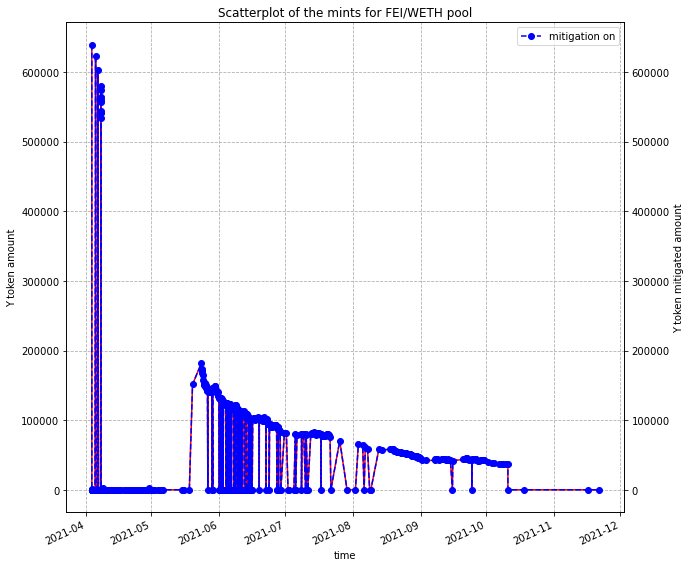

In [ ]:
plot_mints(fei_weth_mints_mitigation_on_df, fei_weth_mints_mitigation_off_df, pool_name='FEI/WETH')

## MEV transactions extraction and analysis

### MEV attacks and possible MEVs extraction

There are 136 MEV attacks performed on the pool and 8789 possible attacks

In [ ]:
fei_weth_filtered_swaps_df, fei_weth_mevs_df = fei_weth_sim.extract_filtered_and_mevs_dfs()

initial len = 49963, filtered len = 49885
txds = 78
out values = 39


In [ ]:
fei_weth_suspicious_filtered_swaps_df, fei_weth_possible_mevs_df = fei_weth_sim.extract_suspicious_and_filtered_swaps_dfs()

initial len = 49963, filtered len = 49843
txds = 120
out values = 60.0


In [ ]:
fei_weth_mevs_df = fei_weth_sim.calculate_attack_profit(fei_weth_mevs_df)

### Plotting values of MEVs and possible MEVs with filtered swaps values

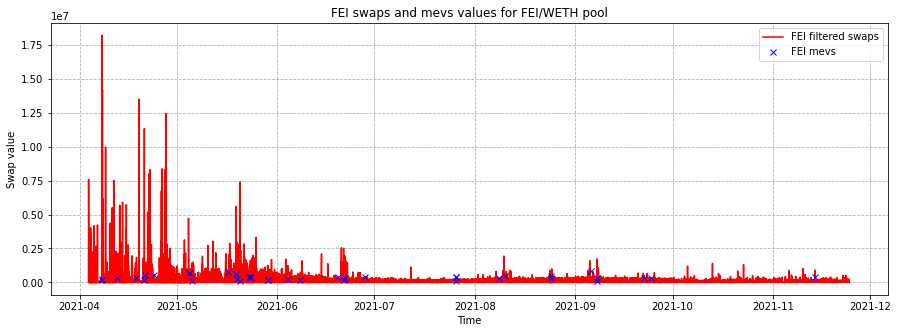

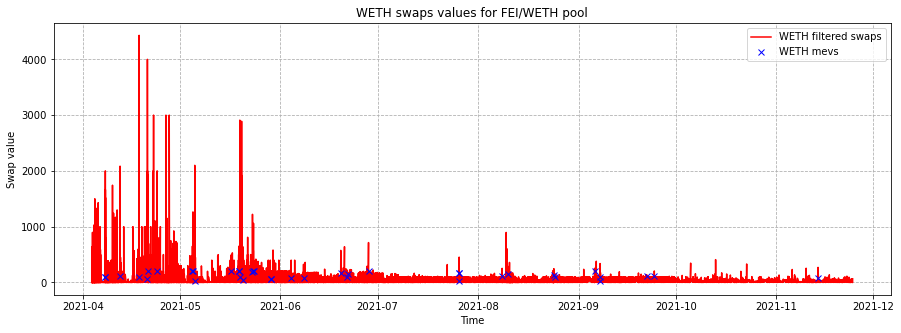

In [ ]:
fei_weth_sim.show_swaps_and_mevs_by_token(fei_weth_filtered_swaps_df, fei_weth_mevs_df, width=15, height=5)

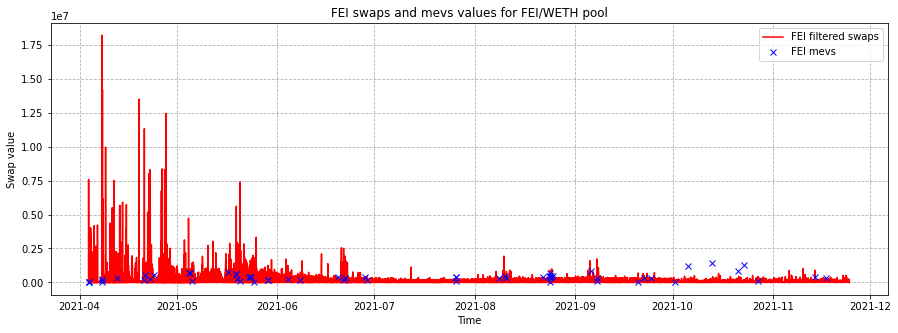

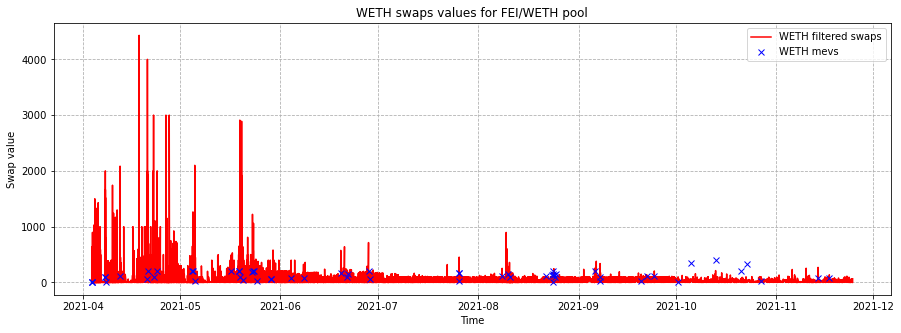

In [ ]:
fei_weth_sim.show_swaps_and_mevs_by_token(fei_weth_suspicious_filtered_swaps_df, fei_weth_possible_mevs_df, width=15, height=5)

### Plotting MEV transactions and possible MEV transactions with filtered swaps daily count distributions

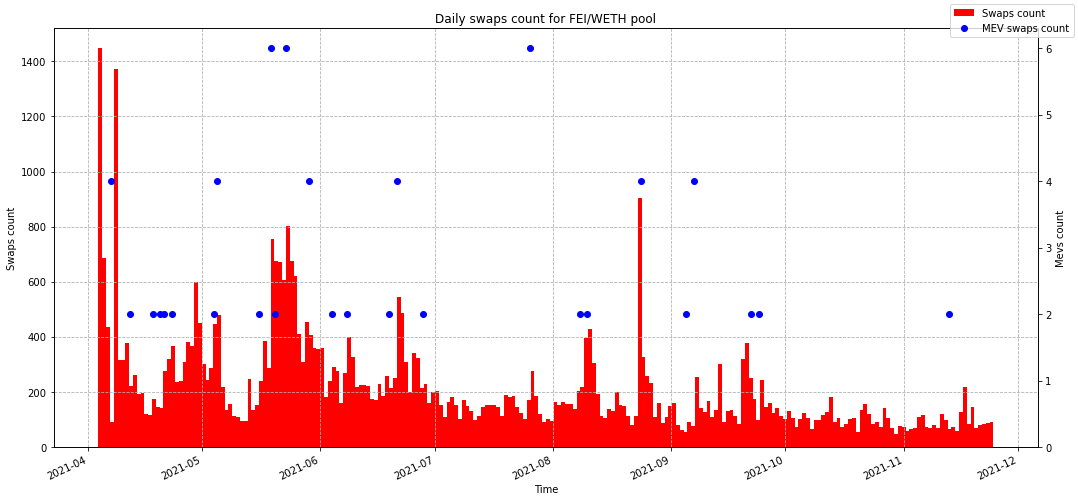

In [ ]:
fei_weth_sim.show_swaps_and_mevs_daily_count_by_token(fei_weth_filtered_swaps_df, fei_weth_mevs_df, mevs_alter_axis=True)

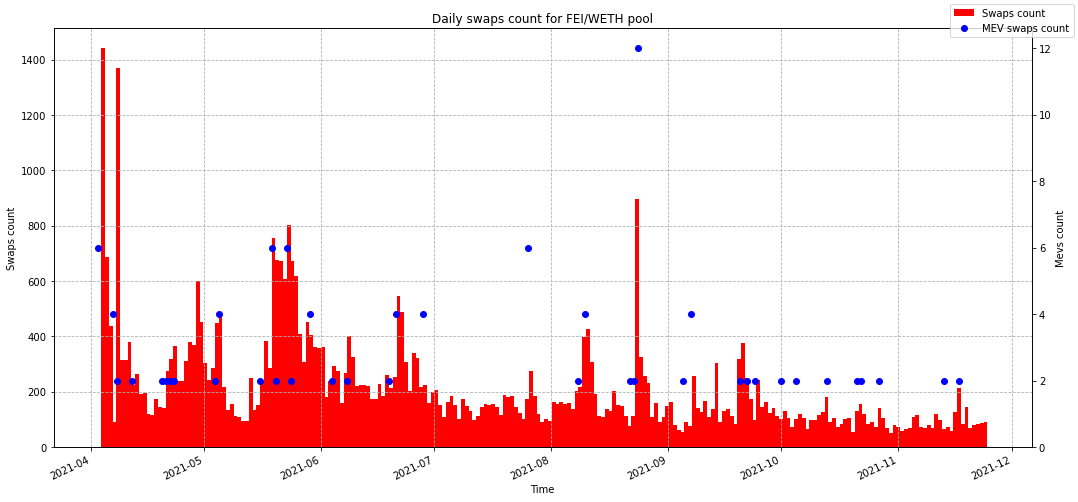

In [ ]:
fei_weth_sim.show_swaps_and_mevs_daily_count_by_token(fei_weth_suspicious_filtered_swaps_df, fei_weth_possible_mevs_df, mevs_alter_axis=True)

### Plotting ratio of MEV attacks to filtered swaps

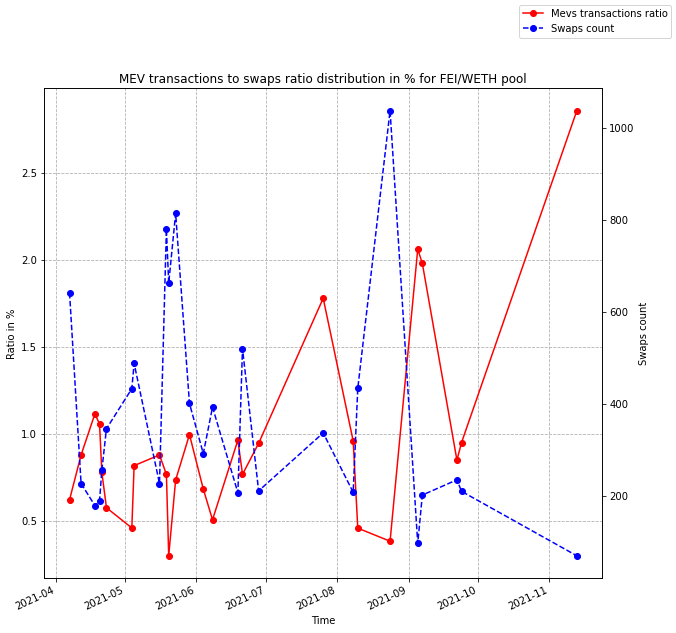

In [ ]:
fei_weth_sim.show_mevs_to_swaps_ratio(fei_weth_filtered_swaps_df, fei_weth_mevs_df)

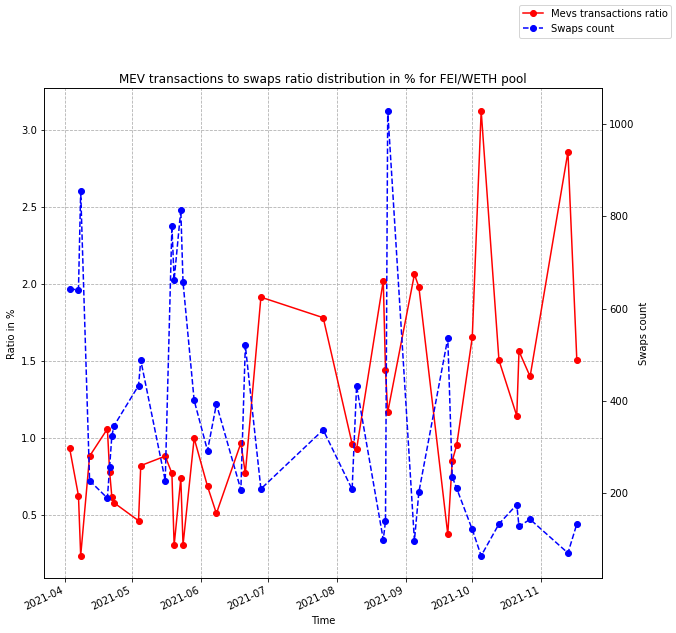

In [ ]:
fei_weth_sim.show_mevs_to_swaps_ratio(fei_weth_suspicious_filtered_swaps_df, fei_weth_possible_mevs_df)

### Plotting ratio of MEVs and suspicious transactions to filtered swaps

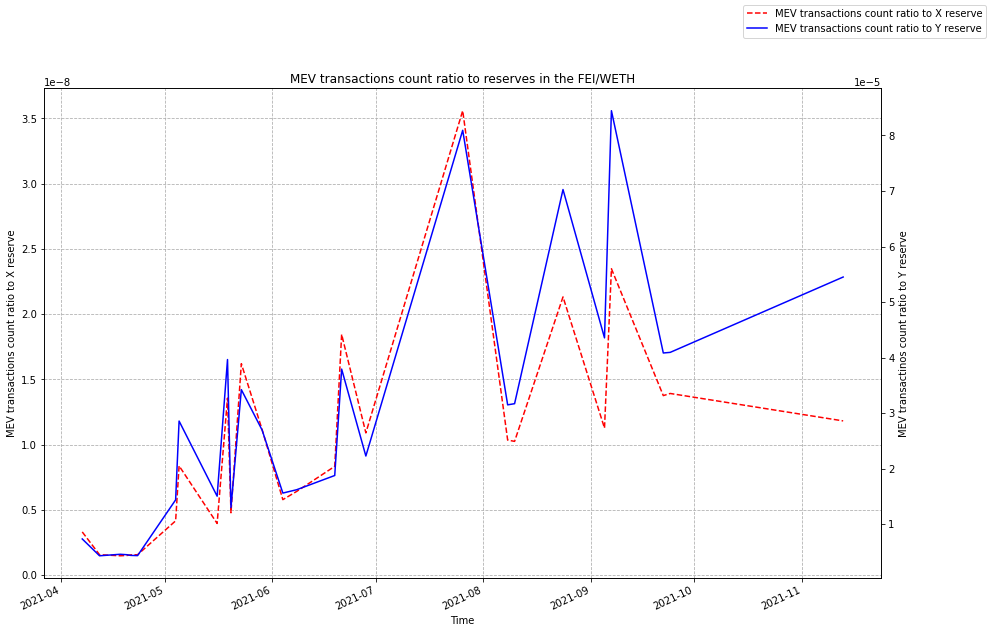

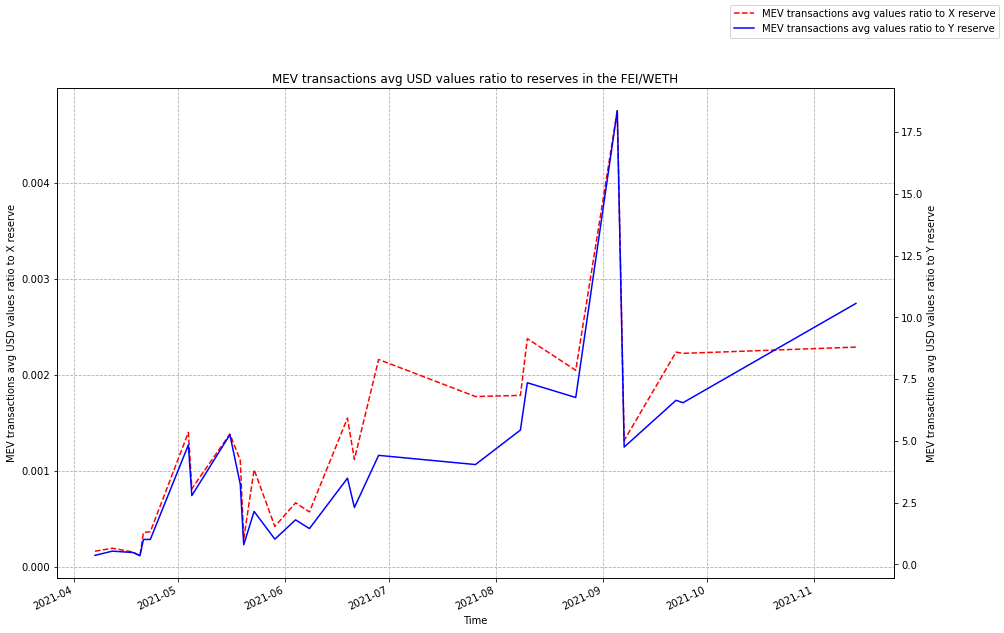

In [ ]:
fei_weth_sim.show_mevs_to_reserves_ratio(fei_weth_swaps_mitigation_off_df, fei_weth_mevs_df, width=15, height=10)
fei_weth_sim.show_mevs_values_to_reserves_ratio(fei_weth_swaps_mitigation_off_df, fei_weth_mevs_df, width=15, height=10)

### Plotting transaction values distribution of passed swaps, blocked swaps and not enough reserves swaps

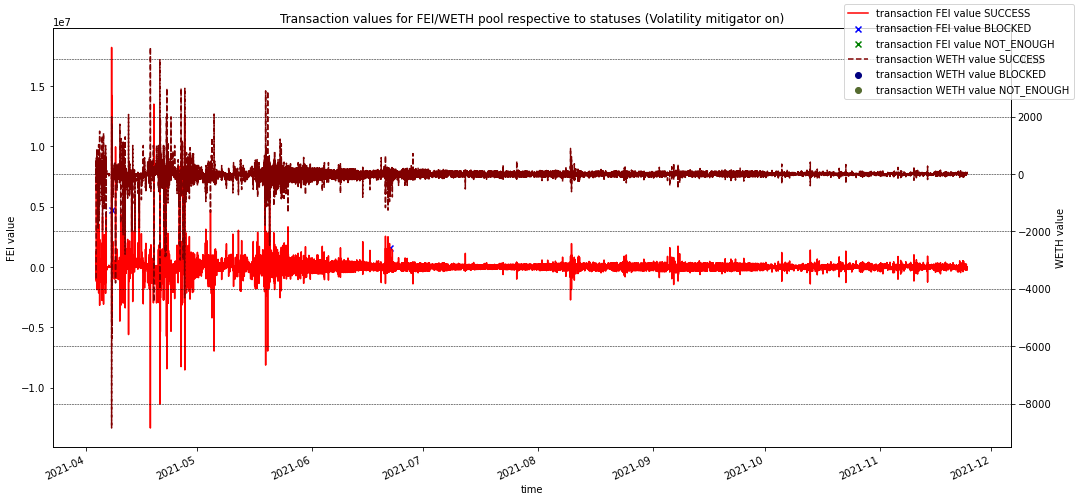

In [ ]:
fei_weth_sim.plot_transactions_by_type(fei_weth_swaps_mitigation_on_df, ignore_success=False, width=15, height=7)

### Plotting mitigation comparison, slice factor distribution, reserves distributions, cumulative prices distributions, transaction frequency distributions, price impact after each transaction distributions

Original FEI/WETH pool has next statuses counts:
SUCCESS    49962
Name: status, dtype: int64
Mitigated FEI/WETH dataframe has next statuses counts:
SUCCESS                             49960
BLOCKED_BY_VOLATILITY_MITIGATION        2
Name: status, dtype: int64
TWAP unavailability ratio for FEI/WETH is 6.0045634682358595e-05
Mitigated FEI/WETH dataframe has next Mitigator statuses:
CHECKED                49959
CANT_CONSULT_ORACLE        3
Name: mitigator_check_status, dtype: int64


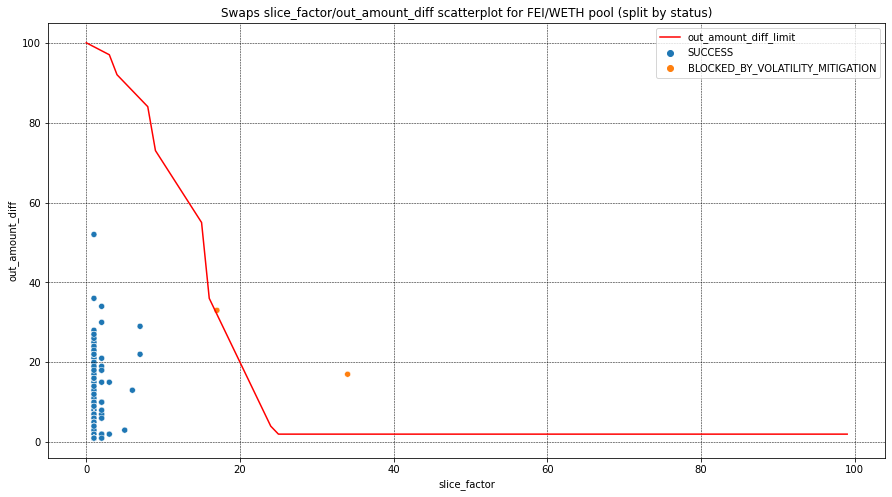

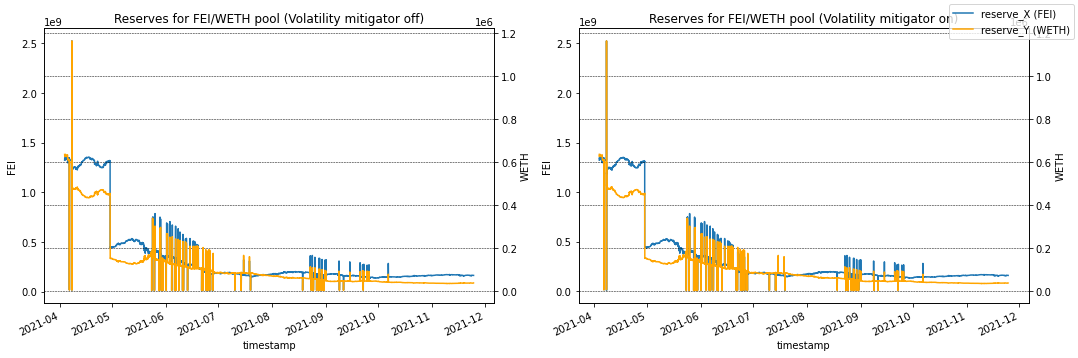

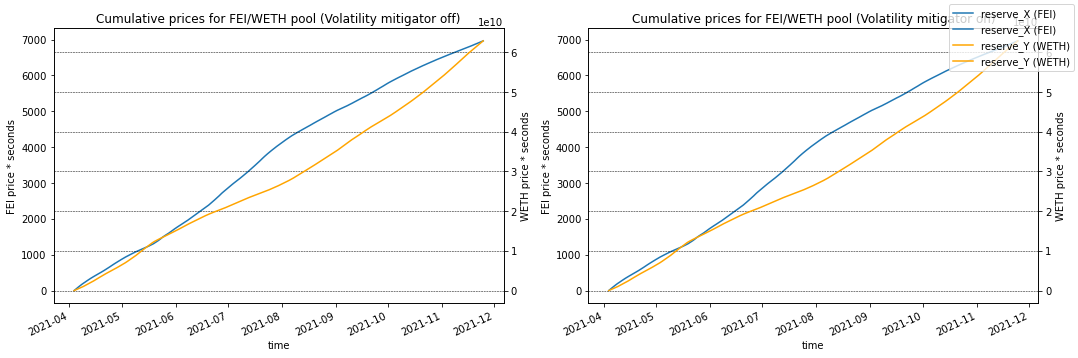

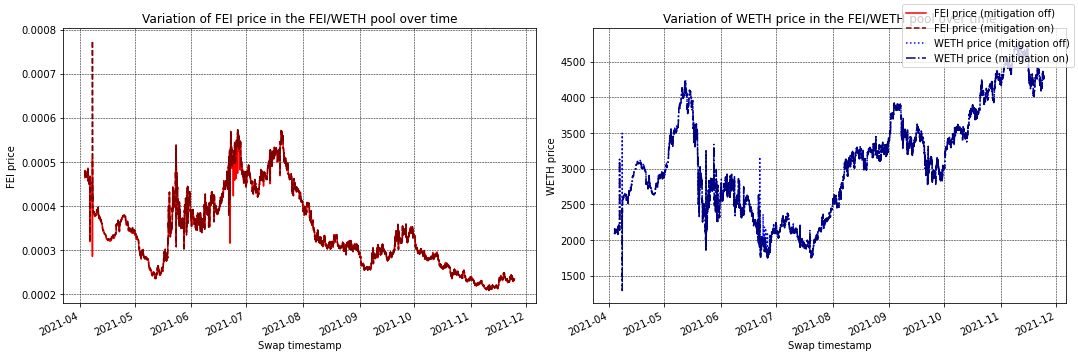

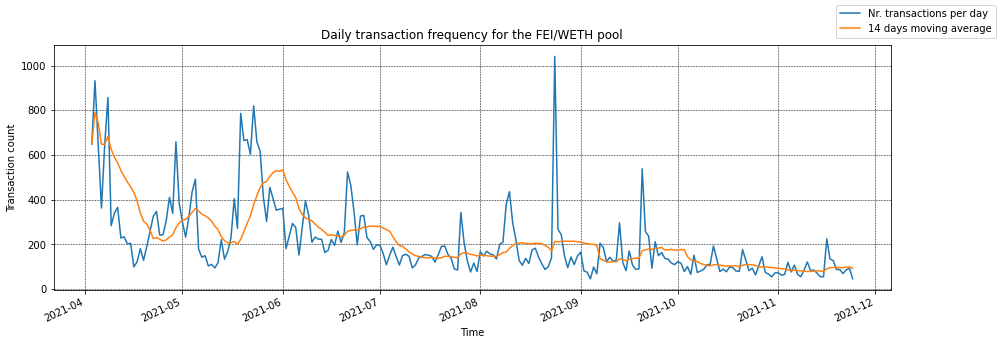

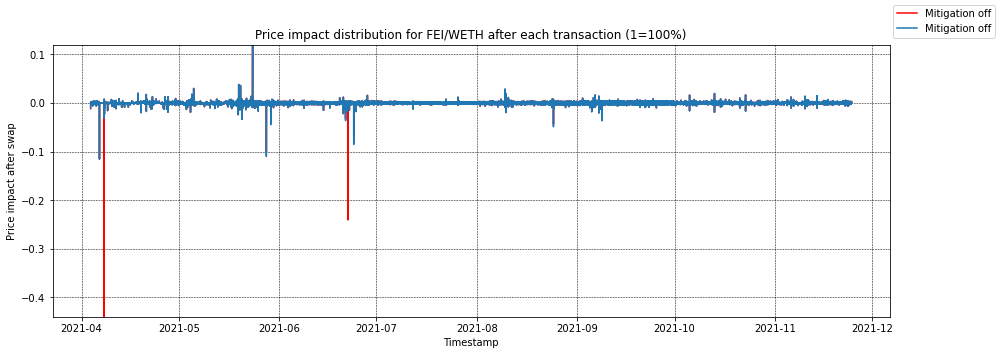

In [ ]:
fei_weth_sim.show_mitigation_comparison(fei_weth_swaps_mitigation_off_df, fei_weth_swaps_mitigation_on_df)
fei_weth_sim.px_hist_blocked_transactions_slice(fei_weth_swaps_mitigation_on_df)
fei_weth_sim.px_hist_blocked_transactions_difference_from_oracle(fei_weth_swaps_mitigation_on_df)
fei_weth_sim.plot_slice_distribution_and_diff_limit_line(fei_weth_swaps_mitigation_on_df)
fei_weth_sim.plot_reserves_with_and_without_mitigation(fei_weth_swaps_mitigation_off_df, fei_weth_swaps_mitigation_on_df)
fei_weth_sim.plot_cumulative_prices_with_and_without_mitigation(fei_weth_swaps_mitigation_off_df, fei_weth_swaps_mitigation_off_df, make_big_num_convert=True)
fei_weth_sim.plot_price_distribution(fei_weth_swaps_mitigation_off_df, fei_weth_swaps_mitigation_on_df, separate_plots=True)
fei_weth_sim.plot_frequency_distribution(fei_weth_swaps_mitigation_on_df)
fei_weth_sim.plot_price_impact(fei_weth_swaps_mitigation_off_df, fei_weth_swaps_mitigation_on_df, 
                                smallest_y=fei_weth_swaps_mitigation_off_df['price_diff'].min(), 
                                biggest_y=fei_weth_swaps_mitigation_off_df['price_diff'].max())

In [ ]:
fei_weth_blocked_df = fei_weth_swaps_mitigation_on_df[fei_weth_swaps_mitigation_on_df['status'] == 'BLOCKED_BY_VOLATILITY_MITIGATION']
fei_weth_blocked_mevs_df = pd.merge(fei_weth_blocked_df, fei_weth_mevs_df, on='txd')
fei_weth_blocked_mevs_df

Empty DataFrame
Columns: [id, token_in_x, token_out_x, token_in_amount, token_out_amount_min, token_out_amount, system_fee, mitigator_check_status, oracle_amount_out, out_amount_diff, slice_factor, slice_factor_curve, status, block_number, block_timestamp, transaction_timestamp, txd, sender_x, to_x, transaction_id, reserve_X_before, reserve_Y_before, k_before, price_X_cumulative_before, price_Y_cumulative_before, is_volatility_mitigator_on_before, reserve_X, reserve_Y, k, price_X_cumulative, price_Y_cumulative, is_volatility_mitigator_on, X_price, price_diff, token_in_y, token_out_y, amount_in, amount_out, amount_usd, timestamp, sender_y, to_y]
Index: []

# HKMT/USDT

In [ ]:
hkmt_usdt_mints_mitigation_off_df

id      X_amount      Y_amount   timestamp   status  block_number  \
0     0  2.325000e+08  3.000000e+07  1598951107  SUCCESS             0   
1    47  1.549714e+08  2.000000e+07  1599460378  SUCCESS         33952   
2    70  1.435528e+02  1.852842e+01  1600092974  SUCCESS         76125   
3    72  1.500000e+02  1.936058e+01  1600103168  SUCCESS         76805   
4    77  5.760610e+02  7.435276e+01  1600109217  SUCCESS         77208   
5    79  3.089770e+02  3.988003e+01  1600134071  SUCCESS         78865   
6    83  2.897847e+01  3.740286e+00  1600145037  SUCCESS         79596   
7    88  2.915278e+02  3.762785e+01  1600173725  SUCCESS         81508   
8    90  1.000000e+01  1.290712e+00  1600174236  SUCCESS         81542   
9    92  2.905769e+03  3.750568e+02  1600174634  SUCCESS         81569   
10   95  8.000000e+01  1.032587e+01  1600186728  SUCCESS         82375   
11   97  1.000000e+02  1.290734e+01  1600190236  SUCCESS         82609   
12  100  3.846644e+03  4.965109e+02  1600193986  SUCCESS         82859   
13  102  3.209790e-01  4.143000e-02  1600228734  SUCCESS         85176   
14  108  1.420280e+04  1.833483e+03  1600273595  SUCCESS         88166   
15  109  5.665201e+03  7.313384e+02  1600273739  SUCCESS         88176   
16  110  5.684944e+03  7.338870e+02  1600273808  SUCCESS         88181   
17  115  2.780034e+04  3.589458e+03  1600275385  SUCCESS         88286   
18  127  9.999996e+00  1.290877e+00  1600339082  SUCCESS         92532   
19  130  1.000000e+01  1.290878e+00  1600340168  SUCCESS         92605   
20  158  2.549242e+01  3.289999e+00  1601157420  SUCCESS        147088   
21  166  1.805766e+02  2.330471e+01  1601782605  SUCCESS        188767   
22  216  7.794032e+01  9.999999e+00  1607457338  SUCCESS        567083   
23  230  9.690870e+01  1.246250e+01  1609271964  SUCCESS        688058   

    block_timestamp  transaction_timestamp  transaction_id  reserve_X_before  \
0        1598951107             1598951107               0      0.000000e+00   
1        1599460387             1599460378              47      2.324832e+08   
2        1600092982             1600092974              70      3.874336e+08   
3        1600103182             1600103168              72      3.874336e+08   
4        1600109227             1600109217              77      3.874331e+08   
5        1600134082             1600134071              79      3.874333e+08   
6        1600145047             1600145037              83      3.874336e+08   
7        1600173727             1600173725              88      3.874337e+08   
8        1600174237             1600174236              90      3.874340e+08   
9        1600174642             1600174634              92      3.874311e+08   
10       1600186732             1600186728              95      3.874336e+08   
11       1600190242             1600190236              97      3.874336e+08   
12       1600193992             1600193986             100      3.874293e+08   
13       1600228747             1600228734             102      3.874337e+08   
14       1600273597             1600273595             108      3.874083e+08   
15       1600273747             1600273739             109      3.874225e+08   
16       1600273822             1600273808             110      3.874282e+08   
17       1600275397             1600275385             115      3.873948e+08   
18       1600339087             1600339082             127      3.874167e+08   
19       1600340182             1600340168             130      3.874166e+08   
20       1601157427             1601157420             158      3.874572e+08   
21       1601782612             1601782605             166      3.874584e+08   
22       1607457352             1607457338             216      3.885972e+08   
23       1609271977             1609271964             230      3.881519e+08   

    reserve_Y_before      k_before  price_X_cumulative_before  \
0       0.000000e+00  0.000000e+00                          0   
1       3.000288e+07  6

In [ ]:
hkmt_usdt_burns_mitigation_off_df

id      X_amount     Y_amount   timestamp   status  block_number  \
0  111   5665.201219   731.338390  1600274402  SUCCESS         88220   
1  117   5684.618907   733.929268  1600282679  SUCCESS         88772   
2  119  27801.582229  3589.298650  1600284487  SUCCESS         88892   
3  121    143.544388    18.529515  1600287333  SUCCESS         89082   
4  123  14203.219302  1833.429928  1600302073  SUCCESS         90065   
5  142    576.034022    74.356343  1600406814  SUCCESS         97048   
6  150   3846.609344   496.516072  1600609927  SUCCESS        110588   
7  169    291.543450    37.625893  1601988788  SUCCESS        202513   
8  212     25.564644     3.280733  1607246437  SUCCESS        553022   
9  320     78.414536     9.940579  1621990216  SUCCESS       1535941   

   block_timestamp  transaction_timestamp  transaction_id  reserve_X_before  \
0       1600274407             1600274402             111      3.874339e+08   
1       1600282687             1600282679             117      3.874342e+08   
2       1600284487             1600284487             119      3.874342e+08   
3       1600287337             1600287333             121      3.874342e+08   
4       1600302082             1600302073             123      3.874342e+08   
5       1600406827             1600406814             142      3.874236e+08   
6       1600609927             1600609927             150      3.874296e+08   
7       1601988802             1601988788             169      3.874580e+08   
8       1607246437             1607246437             212      3.885553e+08   
9       1621990222             1621990216             320      3.910018e+08   

   reserve_Y_before      k_before  price_X_cumulative_before  \
0      5.001444e+07  1.937729e+16                     170675   
1      5.002016e+07  1.937952e+16                     171568   
2      5.001869e+07  1.937895e+16                     171862   
3      5.001154e+07  1.937618e+16                     172098   
4      5.001150e+07  1.937616e+16                     172468   
5      5.000924e+07  1.937476e+16                     185468   
6      5.000832e+07  1.937470e+16                     213375   
7      5.000374e+07  1.937435e+16                     391573   
8      4.986338e+07  1.937468e+16                    1007864   
9      4.956205e+07  1.937885e+16                    2885036   

   price_Y_cumulative_before  is_volatility_mitigator_on_before     reserve_X  \
0                   10245321                              False  3.874282e+08   
1                   10298881                              False  3.874285e+08   
2                   10316541                              False  3.874064e+08   
3                   10330716                              False  3.874340e+08   
4                   10352910                              False  3.874200e+08   
5                   11133082                              False  3.874230e+08   
6                   12807965                              False  3.874258e+08   
7                   23506562                              False  3.874577e+08   
8                   60883101                              False  3.885553e+08   
9                  176534694                              False  3.910017e+08   

      reserve_Y             k  price_X_cumulative  price_Y_cumulative  \
0  5.001370e+07  1.937672e+16              170675            10245321   
1  5.001943e+07  1.937895e+16              171568            10298881   
2  5.001510e+07  1.937617e+16              171862            10316541   
3  5.001152e+07  1.937616e+16              172098            10330716   
4  5.000967e+07  1.937474e+16              172468            10352910   
5  5.000916e+07  1.937470e+16              185468            11133082   
6  5.000783e+07  1.937432e+16              213375            12807965   
7  5.000371e+07  1.937432e+16              391573            23506562   
8  4.986338e+07  1.937468e+16             1007864            60883101   
9  4.956204e+0

In [ ]:
hkmt_usdt_swaps_mitigation_off_df

id token_in token_out  token_in_amount  token_out_amount_min  \
0      1     USDT      HKMT      1388.137176                   0.0   
1      2     USDT      HKMT      2315.057158                   0.0   
2      3     HKMT      USDT     10725.294140                   0.0   
3      4     USDT      HKMT        42.510850                   0.0   
4      5     HKMT      USDT     17884.839162                   0.0   
..   ...      ...       ...              ...                   ...   
336  370     HKMT      USDT      3900.000000                   0.0   
337  371     HKMT      USDT     29450.000000                   0.0   
338  372     HKMT      USDT    281823.000000                   0.0   
339  373     HKMT      USDT     30000.000000                   0.0   
340  374     HKMT      USDT    402277.856847                   0.0   

     token_out_amount  system_fee mitigator_check_status  oracle_amount_out  \
0        10649.994622    5.552549          MITIGATOR_OFF                NaN   
1        17759.287207    9.260229          MITIGATOR_OFF                NaN   
2         1370.343137    5.481373          MITIGATOR_OFF                NaN   
3          326.114092    0.170043          MITIGATOR_OFF                NaN   
4         2284.826296    9.139305          MITIGATOR_OFF                NaN   
..                ...         ...                    ...                ...   
336        501.845058    2.007380          MITIGATOR_OFF                NaN   
337       3789.249062   15.156996          MITIGATOR_OFF                NaN   
338      36232.424229  144.929697          MITIGATOR_OFF                NaN   
339       3853.814221   15.415257          MITIGATOR_OFF                NaN   
340      51619.588203  206.478353          MITIGATOR_OFF                NaN   

     out_amount_diff  slice_factor  slice_factor_curve   status  block_number  \
0                NaN           NaN                 NaN  SUCCESS           5.0   
1                NaN           NaN                 NaN  SUCCESS           8.0   
2                NaN           NaN                 NaN  SUCCESS          10.0   
3                NaN           NaN                 NaN  SUCCESS          83.0   
4                NaN           NaN                 NaN  SUCCESS         109.0   
..               ...           ...                 ...      ...           ...   
336              NaN           NaN                 NaN  SUCCESS     2518381.0   
337              NaN           NaN                 NaN  SUCCESS     2527072.0   
338              NaN           NaN                 NaN  SUCCESS     2532549.0   
339              NaN           NaN                 NaN  SUCCESS     2533035.0   
340              NaN           NaN                 NaN  SUCCESS     2538864.0   

        block_timestamp transaction_timestamp  \
0   2020-09-01 09:06:22   2020-09-01 09:06:15   
1   2020-09-01 09:07:07   2020-09-01 09:07:04   
2   2020-09-01 09:07:37   2020-09-01 09:07:36   
3   2020-09-01 09:25:52   2020-09-01 09:25:52   
4   2020-09-01 09:32:22   2020-09-01 09:32:21   
..                  ...                   ...   
336 2021-11-12 14:20:22   2021-11-12 14:20:12   
337 2021-11-14 02:33:07   2021-11-14 02:32:53   
338 2021-11-15 01:22:22   2021-11-15 01:22:21   
339 2021-11-15 03:23:52   2021-11-15 03:23:42   
340 2021-11-16 03:41:07   2021-11-16 03:40:54   

                                                   txd  \
0    0x9c87f160114aa1bdc22cf332b99df1212b3df326bbbd...   
1    0xd0096539f938f8d9da41874290e6f6467ff31c3200c0...   
2    0x66143b4a40bc38c41b55c6934938936722628ad001e0...   
3    0x4bd8bce026f1e5ccff9b72063b9991298f043afe07f3...   
4    0x79c6a7a64614a1004c4047c2a4e8dfa77adb68715cbd...   
..                                                 ...   
336  0xabc46c55e415b3496a38ba4e335a61927f8acac298b1...   
337  0xfcc48b8045c56367bc6553091e92b93df6395b7fbead...   
338  0x3d3852cbb75bea9ca1449aa04889590ae4c0ff04e650...   
339  0x14296130144edb9cd065726f97e50c5a18b8e5120dea...   
340  0x40d495a37

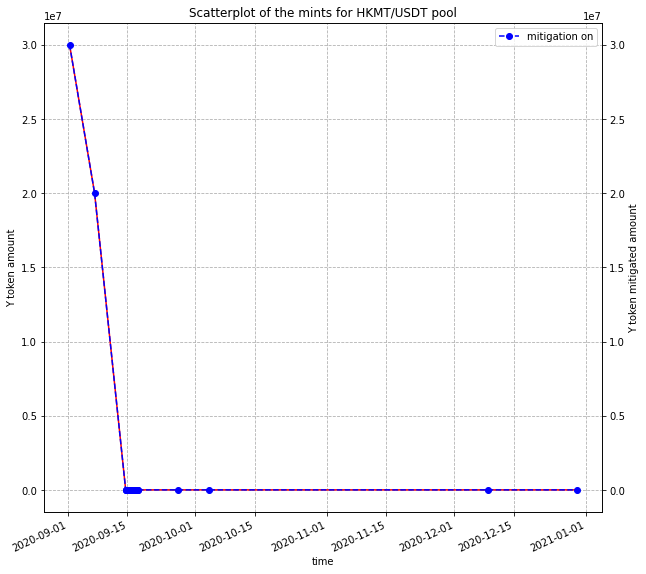

In [ ]:
plot_mints(hkmt_usdt_mints_mitigation_on_df, hkmt_usdt_mints_mitigation_off_df, pool_name='HKMT/USDT')

## MEV transactions extraction and analysis

### MEV attacks and possible MEVs extraction

There are 136 MEV attacks performed on the pool and 8789 possible attacks

In [ ]:
hkmt_usdt_filtered_swaps_df, hkmt_usdt_mevs_df = hkmt_usdt_sim.extract_filtered_and_mevs_dfs()

initial len = 342, filtered len = 342
txds = 0
out values = 0


In [ ]:
hkmt_usdt_suspicious_filtered_swaps_df, hkmt_usdt_possible_mevs_df = hkmt_usdt_sim.extract_suspicious_and_filtered_swaps_dfs()

initial len = 342, filtered len = 342
txds = 0
out values = 0.0


In [ ]:
hkmt_usdt_mevs_df = hkmt_usdt_sim.calculate_attack_profit(hkmt_usdt_mevs_df)

### Plotting values of MEVs and possible MEVs with filtered swaps values

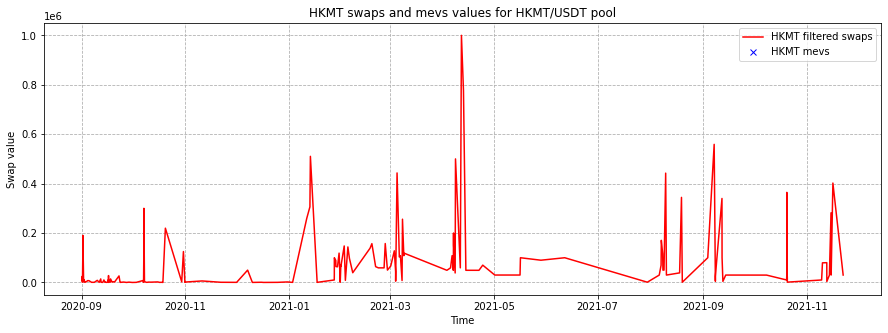

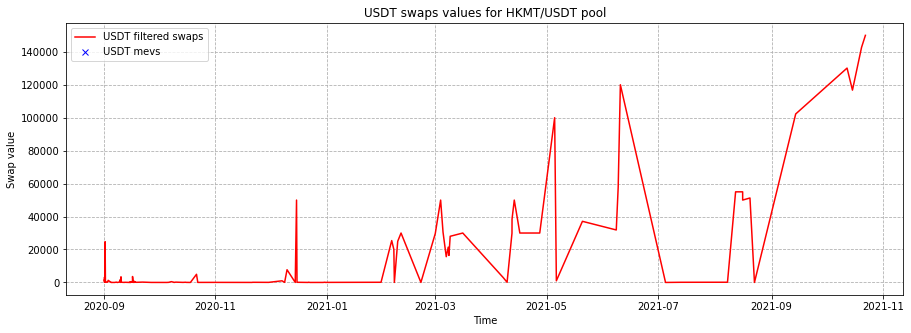

In [ ]:
hkmt_usdt_sim.show_swaps_and_mevs_by_token(hkmt_usdt_filtered_swaps_df, hkmt_usdt_mevs_df, width=15, height=5)

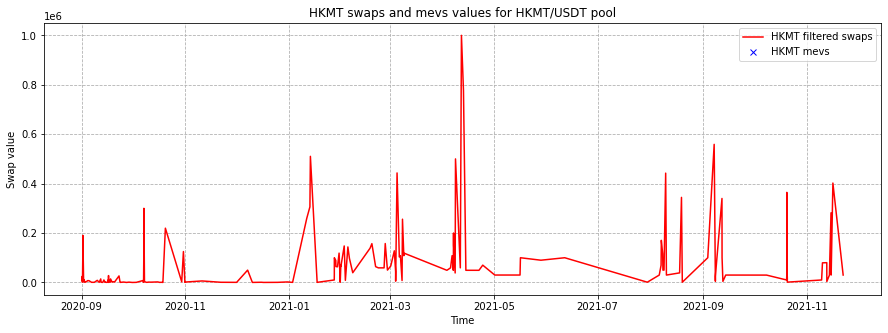

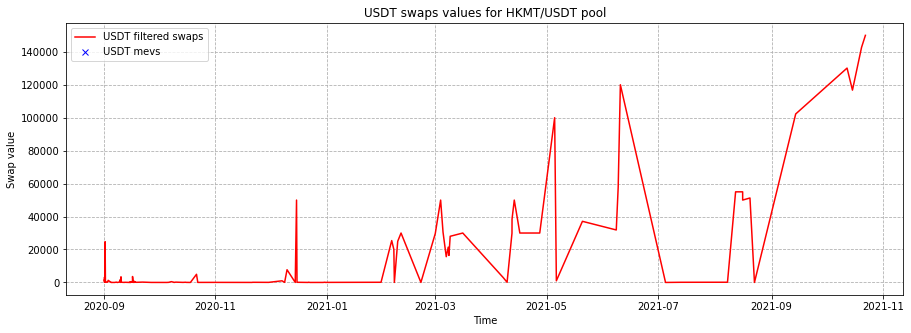

In [ ]:
hkmt_usdt_sim.show_swaps_and_mevs_by_token(hkmt_usdt_suspicious_filtered_swaps_df, hkmt_usdt_possible_mevs_df, width=15, height=5)

### Plotting MEV transactions and possible MEV transactions with filtered swaps daily count distributions

ValueError: Axis limits cannot be NaN or Inf

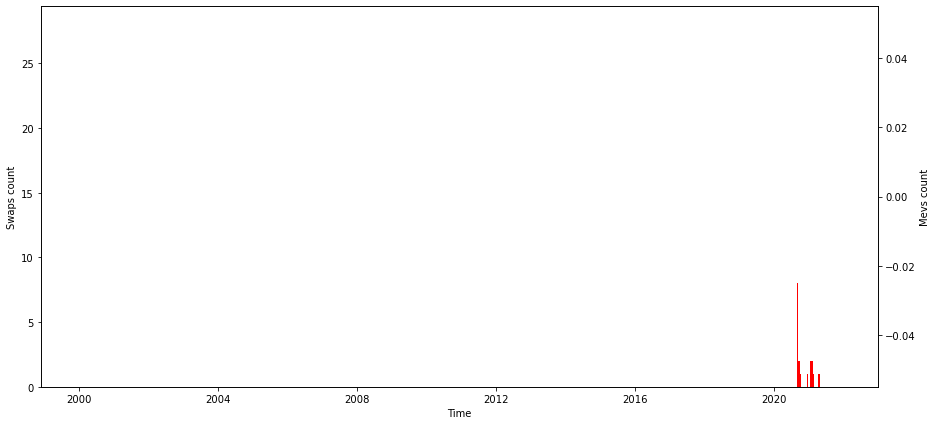

In [ ]:
hkmt_usdt_sim.show_swaps_and_mevs_daily_count_by_token(hkmt_usdt_filtered_swaps_df, hkmt_usdt_mevs_df, mevs_alter_axis=True)

In [ ]:
hkmt_usdt_sim.show_swaps_and_mevs_daily_count_by_token(hkmt_usdt_suspicious_filtered_swaps_df, hkmt_usdt_possible_mevs_df, mevs_alter_axis=True)

### Plotting ratio of MEV attacks to filtered swaps

In [ ]:
hkmt_usdt_sim.show_mevs_to_swaps_ratio(hkmt_usdt_filtered_swaps_df, hkmt_usdt_mevs_df)

In [ ]:
hkmt_usdt_sim.show_mevs_to_swaps_ratio(hkmt_usdt_suspicious_filtered_swaps_df, hkmt_usdt_possible_mevs_df)

### Plotting ratio of MEVs and suspicious transactions to filtered swaps

In [ ]:
hkmt_usdt_sim.show_mevs_to_reserves_ratio(hkmt_usdt_swaps_mitigation_off_df, hkmt_usdt_mevs_df, width=15, height=10)
hkmt_usdt_sim.show_mevs_values_to_reserves_ratio(hkmt_usdt_swaps_mitigation_off_df, hkmt_usdt_mevs_df, width=15, height=10)

### Plotting transaction values distribution of passed swaps, blocked swaps and not enough reserves swaps

In [ ]:
hkmt_usdt_sim.plot_transactions_by_type(hkmt_usdt_swaps_mitigation_on_df, ignore_success=False, width=15, height=7)

### Plotting mitigation comparison, slice factor distribution, reserves distributions, cumulative prices distributions, transaction frequency distributions, price impact after each transaction distributions

In [ ]:
hkmt_usdt_sim.show_mitigation_comparison(hkmt_usdt_swaps_mitigation_off_df, hkmt_usdt_swaps_mitigation_on_df)
hkmt_usdt_sim.px_hist_blocked_transactions_slice(hkmt_usdt_swaps_mitigation_on_df)
hkmt_usdt_sim.px_hist_blocked_transactions_difference_from_oracle(hkmt_usdt_swaps_mitigation_on_df)
hkmt_usdt_sim.plot_slice_distribution_and_diff_limit_line(hkmt_usdt_swaps_mitigation_on_df)
hkmt_usdt_sim.plot_reserves_with_and_without_mitigation(hkmt_usdt_swaps_mitigation_off_df, hkmt_usdt_swaps_mitigation_on_df)
hkmt_usdt_sim.plot_cumulative_prices_with_and_without_mitigation(hkmt_usdt_swaps_mitigation_off_df, hkmt_usdt_swaps_mitigation_off_df)
hkmt_usdt_sim.plot_price_distribution(hkmt_usdt_swaps_mitigation_off_df, hkmt_usdt_swaps_mitigation_on_df, separate_plots=True)
hkmt_usdt_sim.plot_frequency_distribution(hkmt_usdt_swaps_mitigation_on_df)
hkmt_usdt_sim.plot_price_impact(hkmt_usdt_swaps_mitigation_off_df, hkmt_usdt_swaps_mitigation_on_df, 
                                smallest_y=hkmt_usdt_swaps_mitigation_off_df['price_diff'].min(), 
                                biggest_y=hkmt_usdt_swaps_mitigation_off_df['price_diff'].max())

In [ ]:
hkmt_usdt_blocked_df = hkmt_usdt_swaps_mitigation_on_df[hkmt_usdt_swaps_mitigation_on_df['status'] == 'BLOCKED_BY_VOLATILITY_MITIGATION']
hkmt_usdt_blocked_mevs_df = pd.merge(hkmt_usdt_blocked_df, hkmt_usdt_mevs_df, on='txd')
hkmt_usdt_blocked_mevs_df

# IXS/WETH

There are around 68 200 transactions in the pool with 631 mints and 478 burns from May 2020 till November 2021, meaning large transaction history.

In [ ]:
ixs_weth_mints_mitigation_off_df

In [ ]:
ixs_weth_burns_mitigation_off_df

In [ ]:
ixs_weth_swaps_mitigation_off_df

In [ ]:
plot_mints(ixs_weth_mints_mitigation_on_df, ixs_weth_mints_mitigation_off_df, pool_name='IXS/WETH')

## MEV transactions extraction and analysis

### MEV attacks and possible MEVs extraction

There are 77 MEV attacks performed on the pool

In [ ]:
ixs_weth_filtered_swaps_df, ixs_weth_mevs_df = ixs_weth_sim.extract_filtered_and_mevs_dfs()

In [ ]:
ixs_weth_suspicious_filtered_swaps_df, ixs_weth_possible_mevs_df = ixs_weth_sim.extract_suspicious_and_filtered_swaps_dfs()

In [ ]:
ixs_weth_mevs_df = ixs_weth_sim.calculate_attack_profit(ixs_weth_mevs_df)

### Plotting values of MEVs and possible MEVs with filtered swaps values

In [ ]:
ixs_weth_sim.show_swaps_and_mevs_by_token(ixs_weth_filtered_swaps_df, ixs_weth_mevs_df, width=15, height=5)

In [ ]:
ixs_weth_sim.show_swaps_and_mevs_by_token(ixs_weth_suspicious_filtered_swaps_df, ixs_weth_possible_mevs_df, width=15, height=5)

### Plotting MEV transactions and possible MEV transactions with filtered swaps daily count distributions

In [ ]:
ixs_weth_sim.show_swaps_and_mevs_daily_count_by_token(ixs_weth_filtered_swaps_df, ixs_weth_mevs_df, mevs_alter_axis=True)

In [ ]:
ixs_weth_sim.show_swaps_and_mevs_daily_count_by_token(ixs_weth_suspicious_filtered_swaps_df, ixs_weth_possible_mevs_df, mevs_alter_axis=True)

### Plotting ratio of MEV attacks to filtered swaps

In [ ]:
ixs_weth_sim.show_mevs_to_swaps_ratio(ixs_weth_filtered_swaps_df, ixs_weth_mevs_df)

In [ ]:
ixs_weth_sim.show_mevs_to_swaps_ratio(ixs_weth_suspicious_filtered_swaps_df, ixs_weth_possible_mevs_df)

### Plotting ratio of MEVs and suspicious transactions to filtered swaps

In [ ]:
ixs_weth_sim.show_mevs_to_reserves_ratio(ixs_weth_swaps_mitigation_off_df, ixs_weth_mevs_df, width=15, height=10)
ixs_weth_sim.show_mevs_values_to_reserves_ratio(ixs_weth_swaps_mitigation_off_df, ixs_weth_mevs_df, width=15, height=10)

### Plotting transaction values distribution of passed swaps, blocked swaps and not enough reserves swaps

In [ ]:
ixs_weth_sim.plot_transactions_by_type(ixs_weth_swaps_mitigation_on_df, ignore_success=False, width=15, height=7)

### Plotting mitigation comparison, slice factor distribution, reserves distributions, cumulative prices distributions, transaction frequency distributions, price impact after each transaction distributions

In [ ]:
ixs_weth_sim.show_mitigation_comparison(ixs_weth_swaps_mitigation_off_df, ixs_weth_swaps_mitigation_on_df)
ixs_weth_sim.px_hist_blocked_transactions_slice(ixs_weth_swaps_mitigation_on_df)
ixs_weth_sim.px_hist_blocked_transactions_difference_from_oracle(ixs_weth_swaps_mitigation_on_df)
ixs_weth_sim.plot_slice_distribution_and_diff_limit_line(ixs_weth_swaps_mitigation_on_df)
ixs_weth_sim.plot_reserves_with_and_without_mitigation(ixs_weth_swaps_mitigation_off_df, ixs_weth_swaps_mitigation_on_df)
ixs_weth_sim.plot_cumulative_prices_with_and_without_mitigation(ixs_weth_swaps_mitigation_off_df, ixs_weth_swaps_mitigation_off_df)
ixs_weth_sim.plot_price_distribution(ixs_weth_swaps_mitigation_off_df, ixs_weth_swaps_mitigation_on_df, separate_plots=True)
ixs_weth_sim.plot_frequency_distribution(ixs_weth_swaps_mitigation_on_df)
ixs_weth_sim.plot_price_impact(ixs_weth_swaps_mitigation_off_df, ixs_weth_swaps_mitigation_on_df, 
                                smallest_y=ixs_weth_swaps_mitigation_off_df['price_diff'].min(), 
                                biggest_y=ixs_weth_swaps_mitigation_off_df['price_diff'].max())

In [ ]:
ixs_weth_blocked_df = ixs_weth_swaps_mitigation_on_df[ixs_weth_swaps_mitigation_on_df['status'] == 'BLOCKED_BY_VOLATILITY_MITIGATION']
ixs_weth_blocked_mevs_df = pd.merge(ixs_weth_blocked_df, ixs_weth_mevs_df, on='txd')
ixs_weth_blocked_mevs_df

In [ ]:
hkmt_usdt_mints_mitigation_off_df

id      X_amount      Y_amount   timestamp   status  block_number  \
0     0  2.325000e+08  3.000000e+07  1598951107  SUCCESS             0   
1    47  1.549714e+08  2.000000e+07  1599460378  SUCCESS         33952   
2    70  1.435528e+02  1.852842e+01  1600092974  SUCCESS         76125   
3    72  1.500000e+02  1.936058e+01  1600103168  SUCCESS         76805   
4    77  5.760610e+02  7.435276e+01  1600109217  SUCCESS         77208   
5    79  3.089770e+02  3.988003e+01  1600134071  SUCCESS         78865   
6    83  2.897847e+01  3.740286e+00  1600145037  SUCCESS         79596   
7    88  2.915278e+02  3.762785e+01  1600173725  SUCCESS         81508   
8    90  1.000000e+01  1.290712e+00  1600174236  SUCCESS         81542   
9    92  2.905769e+03  3.750568e+02  1600174634  SUCCESS         81569   
10   95  8.000000e+01  1.032587e+01  1600186728  SUCCESS         82375   
11   97  1.000000e+02  1.290734e+01  1600190236  SUCCESS         82609   
12  100  3.846644e+03  4.965109e+02  1600193986  SUCCESS         82859   
13  102  3.209790e-01  4.143000e-02  1600228734  SUCCESS         85176   
14  108  1.420280e+04  1.833483e+03  1600273595  SUCCESS         88166   
15  109  5.665201e+03  7.313384e+02  1600273739  SUCCESS         88176   
16  110  5.684944e+03  7.338870e+02  1600273808  SUCCESS         88181   
17  115  2.780034e+04  3.589458e+03  1600275385  SUCCESS         88286   
18  127  9.999996e+00  1.290877e+00  1600339082  SUCCESS         92532   
19  130  1.000000e+01  1.290878e+00  1600340168  SUCCESS         92605   
20  158  2.549242e+01  3.289999e+00  1601157420  SUCCESS        147088   
21  166  1.805766e+02  2.330471e+01  1601782605  SUCCESS        188767   
22  216  7.794032e+01  9.999999e+00  1607457338  SUCCESS        567083   
23  230  9.690870e+01  1.246250e+01  1609271964  SUCCESS        688058   

    block_timestamp  transaction_timestamp  transaction_id  reserve_X_before  \
0        1598951107             1598951107               0      0.000000e+00   
1        1599460387             1599460378              47      2.324832e+08   
2        1600092982             1600092974              70      3.874336e+08   
3        1600103182             1600103168              72      3.874336e+08   
4        1600109227             1600109217              77      3.874331e+08   
5        1600134082             1600134071              79      3.874333e+08   
6        1600145047             1600145037              83      3.874336e+08   
7        1600173727             1600173725              88      3.874337e+08   
8        1600174237             1600174236              90      3.874340e+08   
9        1600174642             1600174634              92      3.874311e+08   
10       1600186732             1600186728              95      3.874336e+08   
11       1600190242             1600190236              97      3.874336e+08   
12       1600193992             1600193986             100      3.874293e+08   
13       1600228747             1600228734             102      3.874337e+08   
14       1600273597             1600273595             108      3.874083e+08   
15       1600273747             1600273739             109      3.874225e+08   
16       1600273822             1600273808             110      3.874282e+08   
17       1600275397             1600275385             115      3.873948e+08   
18       1600339087             1600339082             127      3.874167e+08   
19       1600340182             1600340168             130      3.874166e+08   
20       1601157427             1601157420             158      3.874572e+08   
21       1601782612             1601782605             166      3.874584e+08   
22       1607457352             1607457338             216      3.885972e+08   
23       1609271977             1609271964             230      3.881519e+08   

    reserve_Y_before      k_before  price_X_cumulative_before  \
0       0.000000e+00  0.000000e+00                          0   
1       3.000288e+07  6

In [ ]:
hkmt_usdt_burns_mitigation_off_df

id      X_amount     Y_amount   timestamp   status  block_number  \
0  111   5665.201219   731.338390  1600274402  SUCCESS         88220   
1  117   5684.618907   733.929268  1600282679  SUCCESS         88772   
2  119  27801.582229  3589.298650  1600284487  SUCCESS         88892   
3  121    143.544388    18.529515  1600287333  SUCCESS         89082   
4  123  14203.219302  1833.429928  1600302073  SUCCESS         90065   
5  142    576.034022    74.356343  1600406814  SUCCESS         97048   
6  150   3846.609344   496.516072  1600609927  SUCCESS        110588   
7  169    291.543450    37.625893  1601988788  SUCCESS        202513   
8  212     25.564644     3.280733  1607246437  SUCCESS        553022   
9  320     78.414536     9.940579  1621990216  SUCCESS       1535941   

   block_timestamp  transaction_timestamp  transaction_id  reserve_X_before  \
0       1600274407             1600274402             111      3.874339e+08   
1       1600282687             1600282679             117      3.874342e+08   
2       1600284487             1600284487             119      3.874342e+08   
3       1600287337             1600287333             121      3.874342e+08   
4       1600302082             1600302073             123      3.874342e+08   
5       1600406827             1600406814             142      3.874236e+08   
6       1600609927             1600609927             150      3.874296e+08   
7       1601988802             1601988788             169      3.874580e+08   
8       1607246437             1607246437             212      3.885553e+08   
9       1621990222             1621990216             320      3.910018e+08   

   reserve_Y_before      k_before  price_X_cumulative_before  \
0      5.001444e+07  1.937729e+16                     170675   
1      5.002016e+07  1.937952e+16                     171568   
2      5.001869e+07  1.937895e+16                     171862   
3      5.001154e+07  1.937618e+16                     172098   
4      5.001150e+07  1.937616e+16                     172468   
5      5.000924e+07  1.937476e+16                     185468   
6      5.000832e+07  1.937470e+16                     213375   
7      5.000374e+07  1.937435e+16                     391573   
8      4.986338e+07  1.937468e+16                    1007864   
9      4.956205e+07  1.937885e+16                    2885036   

   price_Y_cumulative_before  is_volatility_mitigator_on_before     reserve_X  \
0                   10245321                              False  3.874282e+08   
1                   10298881                              False  3.874285e+08   
2                   10316541                              False  3.874064e+08   
3                   10330716                              False  3.874340e+08   
4                   10352910                              False  3.874200e+08   
5                   11133082                              False  3.874230e+08   
6                   12807965                              False  3.874258e+08   
7                   23506562                              False  3.874577e+08   
8                   60883101                              False  3.885553e+08   
9                  176534694                              False  3.910017e+08   

      reserve_Y             k  price_X_cumulative  price_Y_cumulative  \
0  5.001370e+07  1.937672e+16              170675            10245321   
1  5.001943e+07  1.937895e+16              171568            10298881   
2  5.001510e+07  1.937617e+16              171862            10316541   
3  5.001152e+07  1.937616e+16              172098            10330716   
4  5.000967e+07  1.937474e+16              172468            10352910   
5  5.000916e+07  1.937470e+16              185468            11133082   
6  5.000783e+07  1.937432e+16              213375            12807965   
7  5.000371e+07  1.937432e+16              391573            23506562   
8  4.986338e+07  1.937468e+16             1007864            60883101   
9  4.956204e+0

In [ ]:
hkmt_usdt_swaps_mitigation_off_df

id token_in token_out  token_in_amount  token_out_amount_min  \
0      1     USDT      HKMT      1388.137176                   0.0   
1      2     USDT      HKMT      2315.057158                   0.0   
2      3     HKMT      USDT     10725.294140                   0.0   
3      4     USDT      HKMT        42.510850                   0.0   
4      5     HKMT      USDT     17884.839162                   0.0   
..   ...      ...       ...              ...                   ...   
336  370     HKMT      USDT      3900.000000                   0.0   
337  371     HKMT      USDT     29450.000000                   0.0   
338  372     HKMT      USDT    281823.000000                   0.0   
339  373     HKMT      USDT     30000.000000                   0.0   
340  374     HKMT      USDT    402277.856847                   0.0   

     token_out_amount  system_fee mitigator_check_status  oracle_amount_out  \
0        10649.994622    5.552549          MITIGATOR_OFF                NaN   
1        17759.287207    9.260229          MITIGATOR_OFF                NaN   
2         1370.343137    5.481373          MITIGATOR_OFF                NaN   
3          326.114092    0.170043          MITIGATOR_OFF                NaN   
4         2284.826296    9.139305          MITIGATOR_OFF                NaN   
..                ...         ...                    ...                ...   
336        501.845058    2.007380          MITIGATOR_OFF                NaN   
337       3789.249062   15.156996          MITIGATOR_OFF                NaN   
338      36232.424229  144.929697          MITIGATOR_OFF                NaN   
339       3853.814221   15.415257          MITIGATOR_OFF                NaN   
340      51619.588203  206.478353          MITIGATOR_OFF                NaN   

     out_amount_diff  slice_factor  slice_factor_curve   status  block_number  \
0                NaN           NaN                 NaN  SUCCESS           5.0   
1                NaN           NaN                 NaN  SUCCESS           8.0   
2                NaN           NaN                 NaN  SUCCESS          10.0   
3                NaN           NaN                 NaN  SUCCESS          83.0   
4                NaN           NaN                 NaN  SUCCESS         109.0   
..               ...           ...                 ...      ...           ...   
336              NaN           NaN                 NaN  SUCCESS     2518381.0   
337              NaN           NaN                 NaN  SUCCESS     2527072.0   
338              NaN           NaN                 NaN  SUCCESS     2532549.0   
339              NaN           NaN                 NaN  SUCCESS     2533035.0   
340              NaN           NaN                 NaN  SUCCESS     2538864.0   

        block_timestamp transaction_timestamp  \
0   2020-09-01 09:06:22   2020-09-01 09:06:15   
1   2020-09-01 09:07:07   2020-09-01 09:07:04   
2   2020-09-01 09:07:37   2020-09-01 09:07:36   
3   2020-09-01 09:25:52   2020-09-01 09:25:52   
4   2020-09-01 09:32:22   2020-09-01 09:32:21   
..                  ...                   ...   
336 2021-11-12 14:20:22   2021-11-12 14:20:12   
337 2021-11-14 02:33:07   2021-11-14 02:32:53   
338 2021-11-15 01:22:22   2021-11-15 01:22:21   
339 2021-11-15 03:23:52   2021-11-15 03:23:42   
340 2021-11-16 03:41:07   2021-11-16 03:40:54   

                                                   txd  \
0    0x9c87f160114aa1bdc22cf332b99df1212b3df326bbbd...   
1    0xd0096539f938f8d9da41874290e6f6467ff31c3200c0...   
2    0x66143b4a40bc38c41b55c6934938936722628ad001e0...   
3    0x4bd8bce026f1e5ccff9b72063b9991298f043afe07f3...   
4    0x79c6a7a64614a1004c4047c2a4e8dfa77adb68715cbd...   
..                                                 ...   
336  0xabc46c55e415b3496a38ba4e335a61927f8acac298b1...   
337  0xfcc48b8045c56367bc6553091e92b93df6395b7fbead...   
338  0x3d3852cbb75bea9ca1449aa04889590ae4c0ff04e650...   
339  0x14296130144edb9cd065726f97e50c5a18b8e5120dea...   
340  0x40d495a37

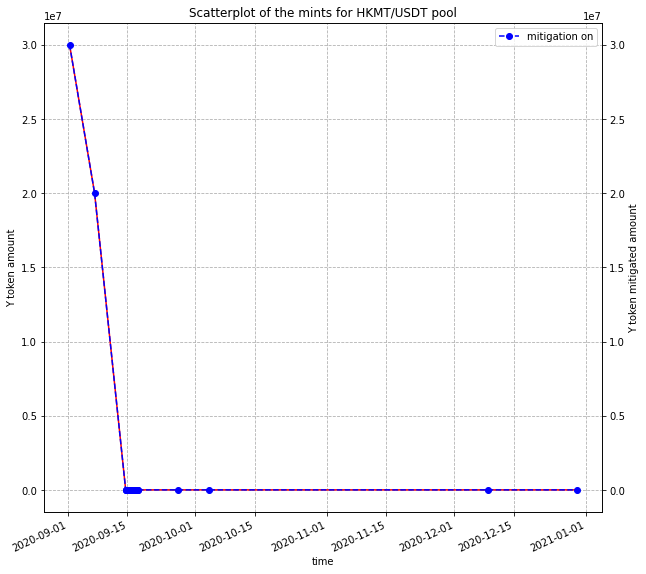

In [ ]:
plot_mints(hkmt_usdt_mints_mitigation_on_df, hkmt_usdt_mints_mitigation_off_df, pool_name='HKMT/USDT')

## MEV transactions extraction and analysis

### MEV attacks and possible MEVs extraction

There are 136 MEV attacks performed on the pool and 8789 possible attacks

In [ ]:
hkmt_usdt_filtered_swaps_df, hkmt_usdt_mevs_df = hkmt_usdt_sim.extract_filtered_and_mevs_dfs()

initial len = 342, filtered len = 342
txds = 0
out values = 0


In [ ]:
hkmt_usdt_suspicious_filtered_swaps_df, hkmt_usdt_possible_mevs_df = hkmt_usdt_sim.extract_suspicious_and_filtered_swaps_dfs()

initial len = 342, filtered len = 342
txds = 0
out values = 0.0


In [ ]:
hkmt_usdt_mevs_df = hkmt_usdt_sim.calculate_attack_profit(hkmt_usdt_mevs_df)

### Plotting values of MEVs and possible MEVs with filtered swaps values

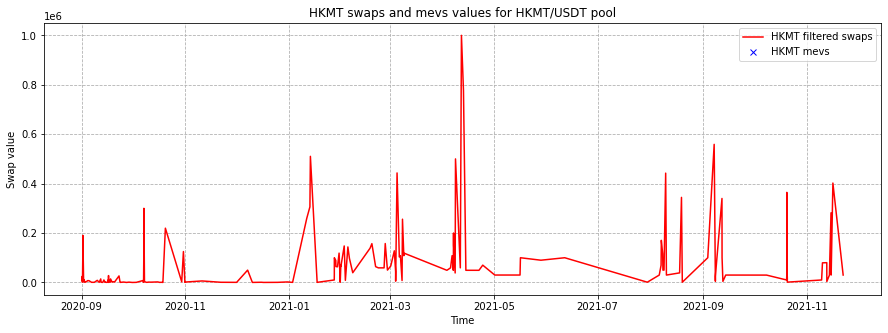

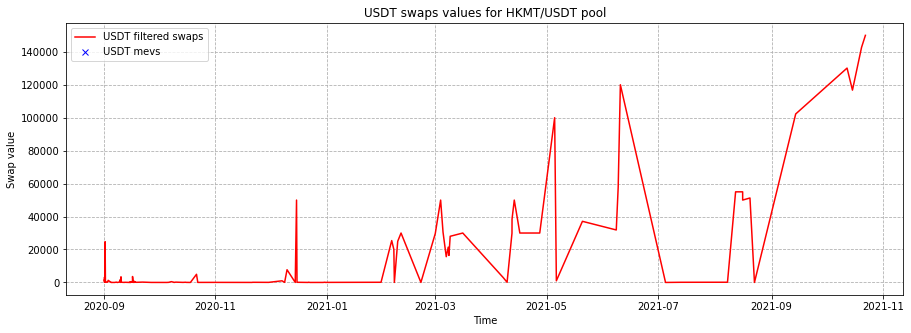

In [ ]:
hkmt_usdt_sim.show_swaps_and_mevs_by_token(hkmt_usdt_filtered_swaps_df, hkmt_usdt_mevs_df, width=15, height=5)

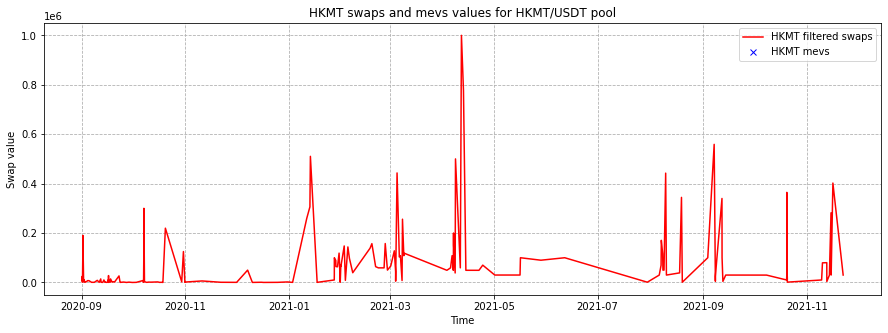

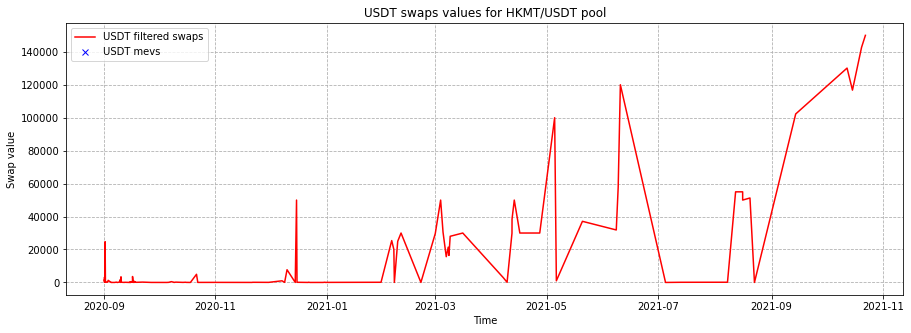

In [ ]:
hkmt_usdt_sim.show_swaps_and_mevs_by_token(hkmt_usdt_suspicious_filtered_swaps_df, hkmt_usdt_possible_mevs_df, width=15, height=5)

### Plotting MEV transactions and possible MEV transactions with filtered swaps daily count distributions

ValueError: Axis limits cannot be NaN or Inf

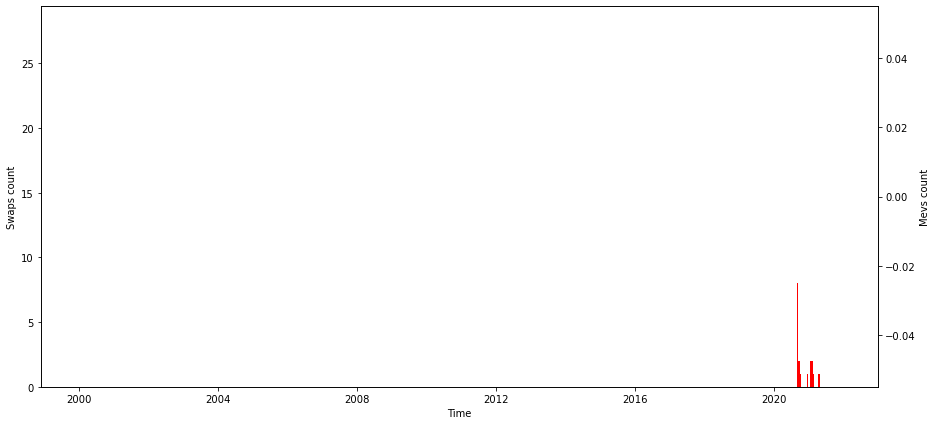

In [ ]:
hkmt_usdt_sim.show_swaps_and_mevs_daily_count_by_token(hkmt_usdt_filtered_swaps_df, hkmt_usdt_mevs_df, mevs_alter_axis=True)

In [ ]:
hkmt_usdt_sim.show_swaps_and_mevs_daily_count_by_token(hkmt_usdt_suspicious_filtered_swaps_df, hkmt_usdt_possible_mevs_df, mevs_alter_axis=True)

### Plotting ratio of MEV attacks to filtered swaps

In [ ]:
hkmt_usdt_sim.show_mevs_to_swaps_ratio(hkmt_usdt_filtered_swaps_df, hkmt_usdt_mevs_df)

In [ ]:
hkmt_usdt_sim.show_mevs_to_swaps_ratio(hkmt_usdt_suspicious_filtered_swaps_df, hkmt_usdt_possible_mevs_df)

### Plotting ratio of MEVs and suspicious transactions to filtered swaps

In [ ]:
hkmt_usdt_sim.show_mevs_to_reserves_ratio(hkmt_usdt_swaps_mitigation_off_df, hkmt_usdt_mevs_df, width=15, height=10)
hkmt_usdt_sim.show_mevs_values_to_reserves_ratio(hkmt_usdt_swaps_mitigation_off_df, hkmt_usdt_mevs_df, width=15, height=10)

### Plotting transaction values distribution of passed swaps, blocked swaps and not enough reserves swaps

In [ ]:
hkmt_usdt_sim.plot_transactions_by_type(hkmt_usdt_swaps_mitigation_on_df, ignore_success=False, width=15, height=7)

### Plotting mitigation comparison, slice factor distribution, reserves distributions, cumulative prices distributions, transaction frequency distributions, price impact after each transaction distributions

In [ ]:
hkmt_usdt_sim.show_mitigation_comparison(hkmt_usdt_swaps_mitigation_off_df, hkmt_usdt_swaps_mitigation_on_df)
hkmt_usdt_sim.px_hist_blocked_transactions_slice(hkmt_usdt_swaps_mitigation_on_df)
hkmt_usdt_sim.px_hist_blocked_transactions_difference_from_oracle(hkmt_usdt_swaps_mitigation_on_df)
hkmt_usdt_sim.plot_slice_distribution_and_diff_limit_line(hkmt_usdt_swaps_mitigation_on_df)
hkmt_usdt_sim.plot_reserves_with_and_without_mitigation(hkmt_usdt_swaps_mitigation_off_df, hkmt_usdt_swaps_mitigation_on_df)
hkmt_usdt_sim.plot_cumulative_prices_with_and_without_mitigation(hkmt_usdt_swaps_mitigation_off_df, hkmt_usdt_swaps_mitigation_off_df)
hkmt_usdt_sim.plot_price_distribution(hkmt_usdt_swaps_mitigation_off_df, hkmt_usdt_swaps_mitigation_on_df, separate_plots=True)
hkmt_usdt_sim.plot_frequency_distribution(hkmt_usdt_swaps_mitigation_on_df)
hkmt_usdt_sim.plot_price_impact(hkmt_usdt_swaps_mitigation_off_df, hkmt_usdt_swaps_mitigation_on_df, 
                                smallest_y=hkmt_usdt_swaps_mitigation_off_df['price_diff'].min(), 
                                biggest_y=hkmt_usdt_swaps_mitigation_off_df['price_diff'].max())

In [ ]:
hkmt_usdt_blocked_df = hkmt_usdt_swaps_mitigation_on_df[hkmt_usdt_swaps_mitigation_on_df['status'] == 'BLOCKED_BY_VOLATILITY_MITIGATION']
hkmt_usdt_blocked_mevs_df = pd.merge(hkmt_usdt_blocked_df, hkmt_usdt_mevs_df, on='txd')
hkmt_usdt_blocked_mevs_df